# TelecomChurn
## Objective - Predict which customers are at high risk of churn.
1. Retaining high profitable customers is the number one business goal.
	Sub Goals - 
	a. Recognize the High Profitable customers.
	b. Confirm if they are leaving.
2. Confirm which customers are at high risk of churning.
3. The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. To do this task well, understanding the typical customer behaviour during churn will be helpful. - last Month if churn found.

In [1]:
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt;
import seaborn as sns;
import warnings 
warnings.simplefilter('ignore')

In [2]:
churn_df = pd.read_csv("telecom_churn_data.csv")

In [3]:
churn_df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [4]:
churn_df.shape

(99999, 226)

In [5]:
churn_df.isnull().sum()

mobile_number        0
circle_id            0
loc_og_t2o_mou    1018
std_og_t2o_mou    1018
loc_ic_t2o_mou    1018
                  ... 
aon                  0
aug_vbc_3g           0
jul_vbc_3g           0
jun_vbc_3g           0
sep_vbc_3g           0
Length: 226, dtype: int64

## EDA - Exploratory Data Analysis
This includes data preparation and checking which data is providing more information.

In [6]:
sortCount = pd.DataFrame(churn_df.isnull().sum()/churn_df.shape[0], columns=["Count"]).sort_values(by="Count", ascending=False)

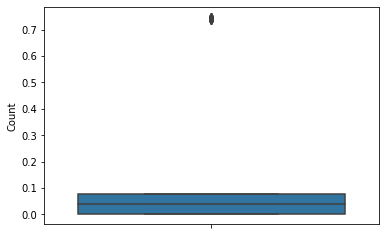

In [7]:
sns.boxplot(y=sortCount["Count"])

Here you can see the some churn columns have 70% null, and the rest of the columns have max 1% data as null.
Thus the data preparation needs to be done accordingly.

In [8]:
sortCount[sortCount["Count"]>=0.7].index.values

array(['arpu_3g_6', 'night_pck_user_6', 'total_rech_data_6', 'arpu_2g_6',
       'max_rech_data_6', 'fb_user_6', 'av_rech_amt_data_6',
       'date_of_last_rech_data_6', 'count_rech_2g_6', 'count_rech_3g_6',
       'date_of_last_rech_data_7', 'total_rech_data_7', 'fb_user_7',
       'max_rech_data_7', 'night_pck_user_7', 'count_rech_2g_7',
       'av_rech_amt_data_7', 'arpu_2g_7', 'count_rech_3g_7', 'arpu_3g_7',
       'total_rech_data_9', 'count_rech_3g_9', 'fb_user_9',
       'max_rech_data_9', 'arpu_3g_9', 'date_of_last_rech_data_9',
       'night_pck_user_9', 'arpu_2g_9', 'count_rech_2g_9',
       'av_rech_amt_data_9', 'total_rech_data_8', 'arpu_3g_8',
       'fb_user_8', 'night_pck_user_8', 'av_rech_amt_data_8',
       'max_rech_data_8', 'count_rech_3g_8', 'arpu_2g_8',
       'count_rech_2g_8', 'date_of_last_rech_data_8'], dtype=object)

Above are the columns which have little important data. Lets check the unique values present in the above columns to check if any valuable information is present in the given columns

In [9]:
for val in sortCount[sortCount["Count"]>=0.7].index.values:
    print("Column - ", val, " has given unique values - ",churn_df[val].unique())

Column -  arpu_3g_6  has given unique values -  [212.17    nan   0.   ...  76.93 141.48 235.68]
Column -  night_pck_user_6  has given unique values -  [ 0. nan  1.]
Column -  total_rech_data_6  has given unique values -  [ 1. nan  3.  5.  4.  2.  6.  8.  7. 12. 16. 11. 10. 14. 20.  9. 18. 29.
 23. 15. 22. 27. 17. 21. 13. 19. 35. 25. 33. 61. 55. 24. 26. 28. 40. 32.
 46. 34.]
Column -  arpu_2g_6  has given unique values -  [212.17    nan   0.   ...  91.82  36.14  18.68]
Column -  max_rech_data_6  has given unique values -  [2.520e+02       nan 5.600e+01 1.540e+02 2.500e+01 2.740e+02 1.980e+02
 2.300e+01 1.400e+01 6.550e+02 9.800e+01 1.250e+02 4.100e+01 1.450e+02
 4.600e+01 1.520e+02 1.700e+01 4.900e+01 9.100e+01 1.790e+02 1.490e+02
 2.900e+01 1.770e+02 4.550e+02 8.000e+00 1.000e+00 3.300e+01 1.500e+01
 5.050e+02 4.800e+01 2.020e+02 4.490e+02 6.100e+01 2.200e+01 5.200e+01
 7.550e+02 5.000e+00 1.010e+02 9.000e+00 9.510e+02 2.950e+02 1.555e+03
 1.505e+03 8.550e+02 9.950e+02 1.300e+01 1.255e

There seems to be some data present, we can check if the data is required with the data dictionary.

In [10]:
sortCount[sortCount["Count"]<0.7].index.values

array(['ic_others_9', 'std_og_mou_9', 'std_og_t2c_mou_9', 'isd_ic_mou_9',
       'std_ic_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'spl_ic_mou_9',
       'og_others_9', 'loc_ic_t2t_mou_9', 'std_ic_t2o_mou_9',
       'loc_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'loc_ic_t2f_mou_9',
       'loc_ic_mou_9', 'std_ic_t2m_mou_9', 'std_og_t2f_mou_9',
       'std_og_t2t_mou_9', 'std_ic_t2t_mou_9', 'loc_og_mou_9',
       'roam_og_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9',
       'roam_ic_mou_9', 'offnet_mou_9', 'loc_og_t2c_mou_9',
       'loc_og_t2t_mou_9', 'std_og_t2m_mou_9', 'onnet_mou_9',
       'onnet_mou_8', 'std_ic_t2t_mou_8', 'std_ic_mou_8',
       'loc_ic_t2t_mou_8', 'roam_og_mou_8', 'std_ic_t2m_mou_8',
       'loc_ic_mou_8', 'std_ic_t2f_mou_8', 'roam_ic_mou_8',
       'std_ic_t2o_mou_8', 'loc_og_t2t_mou_8', 'loc_ic_t2f_mou_8',
       'offnet_mou_8', 'loc_ic_t2m_mou_8', 'loc_og_t2m_mou_8',
       'isd_og_mou_8', 'ic_others_8', 'og_others_8', 'spl_ic_mou_8',
       'loc_og_t2f_mou_8', 'std_o

In [11]:
churn_df.dtypes

mobile_number       int64
circle_id           int64
loc_og_t2o_mou    float64
std_og_t2o_mou    float64
loc_ic_t2o_mou    float64
                   ...   
aon                 int64
aug_vbc_3g        float64
jul_vbc_3g        float64
jun_vbc_3g        float64
sep_vbc_3g        float64
Length: 226, dtype: object

lets check what is the output of the churn data, this is done to understand the context of the 70% empty columns:
1. The data dictionary contains meanings of abbreviations. Some frequent ones are loc (local), IC (incoming), OG (outgoing), T2T (telecom operator to telecom operator), T2O (telecom operator to another operator), RECH (recharge) etc.
2. The attributes containing 6, 7, 8, 9 as suffixes imply that those correspond to the months 6, 7, 8, 9 respectively.

As the data is arranged between multiple columns, lets first check what are teh unique columns available, so that we can focus if any EDA can be done in total across the dataset.

In [12]:
uniqueColList = [];
for val in churn_df.columns:
    if((val[-1]=="6") or(val[-1]=="7") or(val[-1]=="8") or(val[-1]=="9") ):
        uniqueColList.append(val[:-2])
    elif((val[:3]=="jun") or(val[:3]=="jul") or(val[:3]=="aug") or(val[:3]=="sep") ):
        uniqueColList.append(val[4:])
        

In [13]:
set(uniqueColList)

{'arpu',
 'arpu_2g',
 'arpu_3g',
 'av_rech_amt_data',
 'count_rech_2g',
 'count_rech_3g',
 'date_of_last_rech',
 'date_of_last_rech_data',
 'fb_user',
 'ic_others',
 'isd_ic_mou',
 'isd_og_mou',
 'last_date_of_month',
 'last_day_rch_amt',
 'loc_ic_mou',
 'loc_ic_t2f_mou',
 'loc_ic_t2m_mou',
 'loc_ic_t2t_mou',
 'loc_og_mou',
 'loc_og_t2c_mou',
 'loc_og_t2f_mou',
 'loc_og_t2m_mou',
 'loc_og_t2t_mou',
 'max_rech_amt',
 'max_rech_data',
 'monthly_2g',
 'monthly_3g',
 'night_pck_user',
 'offnet_mou',
 'og_others',
 'onnet_mou',
 'roam_ic_mou',
 'roam_og_mou',
 'sachet_2g',
 'sachet_3g',
 'spl_ic_mou',
 'spl_og_mou',
 'std_ic_mou',
 'std_ic_t2f_mou',
 'std_ic_t2m_mou',
 'std_ic_t2o_mou',
 'std_ic_t2t_mou',
 'std_og_mou',
 'std_og_t2c_mou',
 'std_og_t2f_mou',
 'std_og_t2m_mou',
 'std_og_t2t_mou',
 'total_ic_mou',
 'total_og_mou',
 'total_rech_amt',
 'total_rech_data',
 'total_rech_num',
 'vbc_3g',
 'vol_2g_mb',
 'vol_3g_mb'}

In [14]:
dataNotFound = [];
for val in sortCount[sortCount["Count"]>=0.7].index.values:
    if((val[-1]=="6") or(val[-1]=="7") or(val[-1]=="8") or(val[-1]=="9") ):
        dataNotFound.append(val[:-2])
    elif((val[:3]=="jun") or(val[:3]=="jul") or(val[:3]=="aug") or(val[:3]=="sep") ):
        dataNotFound.append(val[4:])
        

In [15]:
dataNotFound

['arpu_3g',
 'night_pck_user',
 'total_rech_data',
 'arpu_2g',
 'max_rech_data',
 'fb_user',
 'av_rech_amt_data',
 'date_of_last_rech_data',
 'count_rech_2g',
 'count_rech_3g',
 'date_of_last_rech_data',
 'total_rech_data',
 'fb_user',
 'max_rech_data',
 'night_pck_user',
 'count_rech_2g',
 'av_rech_amt_data',
 'arpu_2g',
 'count_rech_3g',
 'arpu_3g',
 'total_rech_data',
 'count_rech_3g',
 'fb_user',
 'max_rech_data',
 'arpu_3g',
 'date_of_last_rech_data',
 'night_pck_user',
 'arpu_2g',
 'count_rech_2g',
 'av_rech_amt_data',
 'total_rech_data',
 'arpu_3g',
 'fb_user',
 'night_pck_user',
 'av_rech_amt_data',
 'max_rech_data',
 'count_rech_3g',
 'arpu_2g',
 'count_rech_2g',
 'date_of_last_rech_data']

In [16]:
sortCount

,Count
arpu_3g_6,0.748467
night_pck_user_6,0.748467
total_rech_data_6,0.748467
arpu_2g_6,0.748467
max_rech_data_6,0.748467
...,...
max_rech_amt_7,0.000000
max_rech_amt_6,0.000000
total_rech_amt_9,0.000000
total_rech_amt_8,0.000000


I am trying to view overall what columns are present and how much of data is present in the churn_df, just to understand the overall data strength
Created DataFrame - 
ColumnName|Jun|Jul|Aug|Sep|

In [17]:
dataStrength_df = pd.DataFrame(columns=["ColumnName", "Jun", "Jul", "Aug", "Sep"])

In [18]:
dataStrength_df.head()

,ColumnName,Jun,Jul,Aug,Sep


In [19]:
dataStrength_df["ColumnName"] = list(set(uniqueColList))

In [20]:
primaryColList=["Jun", "Jul", "Aug", "Sep"]
monthList = ["_6", "_7", "_8", "_9"]
startList = ["jun_", "jul_", "aug_", "sep_"]
for val in set(uniqueColList):    
    for index, dat in enumerate(monthList):
        colName1 = val+dat;
        colName2 = startList[index]+val;
        if(colName1 in churn_df.columns.values.tolist()):
            dataStrength_df.loc[dataStrength_df["ColumnName"]==val, primaryColList[index]] = churn_df[colName1].isnull().sum()/churn_df.shape[0]
        elif(colName2 in churn_df.columns.values.tolist()):
            dataStrength_df.loc[dataStrength_df["ColumnName"]==val, primaryColList[index]] = churn_df[colName2].isnull().sum()/churn_df.shape[0]

            

In [21]:
dataStrength_df.set_index("ColumnName", inplace=True)
dataStrength_df.sort_values(by="ColumnName")

,Jun,Jul,Aug,Sep
ColumnName,,,,
arpu,0,0,0,0
arpu_2g,0.748467,0.744287,0.736607,0.740777
arpu_3g,0.748467,0.744287,0.736607,0.740777
av_rech_amt_data,0.748467,0.744287,0.736607,0.740777
count_rech_2g,0.748467,0.744287,0.736607,0.740777
count_rech_3g,0.748467,0.744287,0.736607,0.740777
date_of_last_rech,0.0160702,0.0176702,0.0362204,0.0476005
date_of_last_rech_data,0.748467,0.744287,0.736607,0.740777
fb_user,0.748467,0.744287,0.736607,0.740777


In [22]:
dataStrength_df["Jun"] = dataStrength_df["Jun"].astype("float")
dataStrength_df["Jul"] = dataStrength_df["Jul"].astype("float")
dataStrength_df["Aug"] = dataStrength_df["Aug"].astype("float")
dataStrength_df["Sep"] = dataStrength_df["Sep"].astype("float")

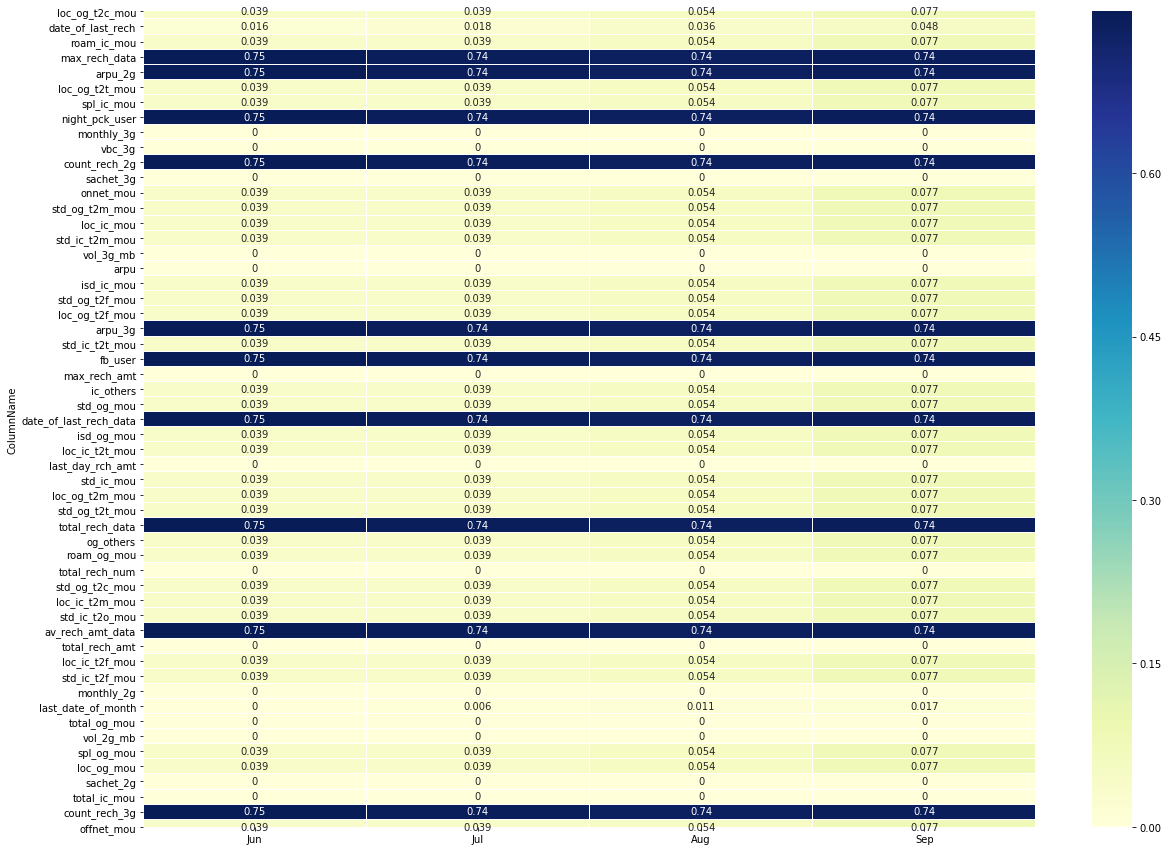

In [23]:
plt.figure(figsize=(20, 15))
sns.heatmap(dataStrength_df, annot=True, linewidths=.1, cmap="YlGnBu")

In [24]:
dataStrength_df.sort_values(["Jun", "Jul", "Aug", "Sep"], ascending=False)

,Jun,Jul,Aug,Sep
ColumnName,,,,
max_rech_data,0.748467,0.744287,0.736607,0.740777
arpu_2g,0.748467,0.744287,0.736607,0.740777
night_pck_user,0.748467,0.744287,0.736607,0.740777
count_rech_2g,0.748467,0.744287,0.736607,0.740777
arpu_3g,0.748467,0.744287,0.736607,0.740777
fb_user,0.748467,0.744287,0.736607,0.740777
date_of_last_rech_data,0.748467,0.744287,0.736607,0.740777
total_rech_data,0.748467,0.744287,0.736607,0.740777
av_rech_amt_data,0.748467,0.744287,0.736607,0.740777


From this data, below hypothesis can be found:
1. total_rech_data null data is increasing from Jun to Jul.
2. Wherease teh max_rech_data, Count_rech_3g, av_rech_amt_data, data_of_last_rech_data, fb_user, arpu_3g, count_rech_2g, arpu_2g, night_pck_user null count is decreasing from Jun to Jul.
3. For the rest of the data small quantity of null data is increasing from Jun->Jul->Aug->Sep.

Lets visualize the given columns and amount of data available for the given exceeding empty columns
1. max_rech_data
2. count_rech_2g
3. arpu_2g
4. av_rech_amt_data
5. total_rech_data
6. fb_user
7. count_rech_3g
8. arpu_3g
9. night_pck_user
10. date_of_last_rech_data

In [25]:
churn_df[["max_rech_data_6", "max_rech_data_7", "max_rech_data_8", "max_rech_data_9", 
                     "count_rech_2g_6", "count_rech_2g_7", "count_rech_2g_8", "count_rech_2g_9",
         "av_rech_amt_data_6", "av_rech_amt_data_7", "av_rech_amt_data_8", "av_rech_amt_data_9"]]

,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
0,252.0,252.0,252.0,NaN,0.0,0.0,0.0,NaN,252.0,252.0,252.0,NaN
1,NaN,154.0,25.0,NaN,NaN,1.0,2.0,NaN,NaN,154.0,50.0,NaN
2,NaN,NaN,NaN,46.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,46.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,56.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,56.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
99994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99996,25.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,39.0,NaN,NaN,NaN
99997,202.0,179.0,179.0,252.0,1.0,0.0,0.0,0.0,583.0,358.0,716.0,862.0


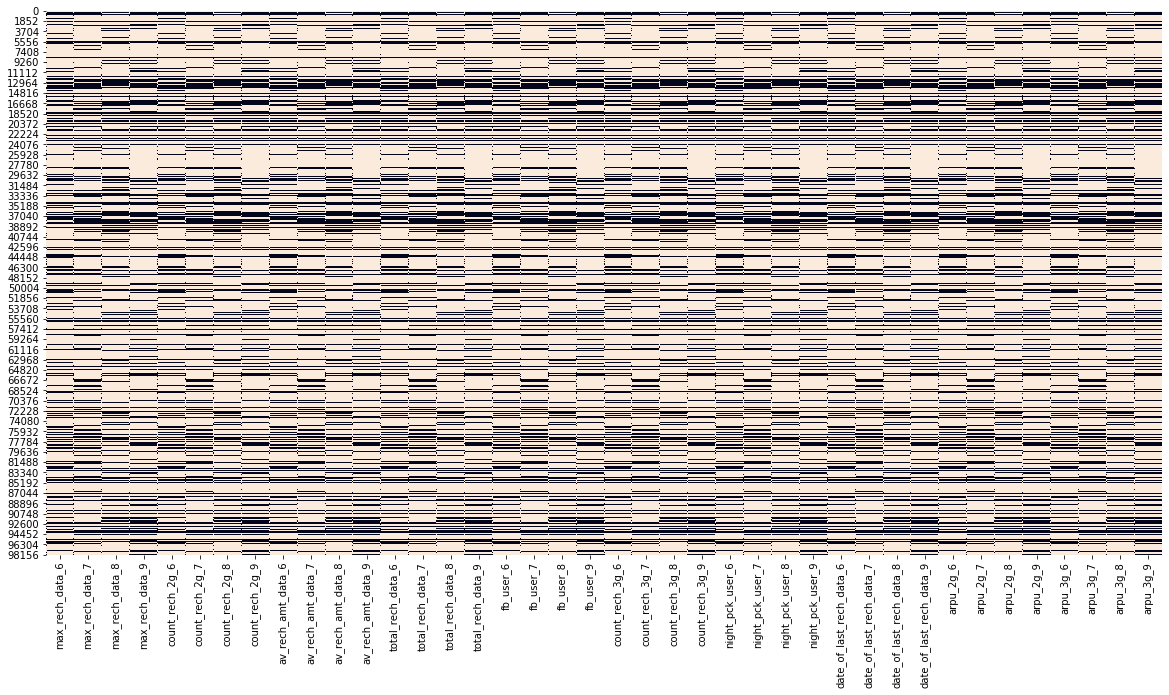

In [26]:
plt.figure(figsize=(20, 10))
sns.heatmap(churn_df[["max_rech_data_6", "max_rech_data_7", "max_rech_data_8", "max_rech_data_9", 
                     "count_rech_2g_6", "count_rech_2g_7", "count_rech_2g_8", "count_rech_2g_9",
         "av_rech_amt_data_6", "av_rech_amt_data_7", "av_rech_amt_data_8", "av_rech_amt_data_9",
        "total_rech_data_6", "total_rech_data_7", "total_rech_data_8", "total_rech_data_9",
        "fb_user_6", "fb_user_7", "fb_user_8", "fb_user_9", 
        "count_rech_3g_6", "count_rech_3g_7", "count_rech_3g_8", "count_rech_3g_9",
        "night_pck_user_6", "night_pck_user_7", "night_pck_user_8", "night_pck_user_9",
        "date_of_last_rech_data_6", "date_of_last_rech_data_7", "date_of_last_rech_data_8", "date_of_last_rech_data_9",
        "arpu_2g_6", "arpu_2g_7", "arpu_2g_8", "arpu_2g_9",
        "arpu_3g_6", "arpu_3g_7", "arpu_3g_8", "arpu_3g_9"]].isnull(), cbar=False)

## Impute empty data

Here if you notice the customers who don't have data continue to have no data in the rest of the columns. But the columns which have data mostly continue to have data.

In [27]:
for data in churn_df.columns.values.tolist():
    print("Column ", data, " has ", churn_df[data].nunique(), " unique number of records.")
    if(churn_df[data].nunique()==1):
        print("\tUnique Values :", churn_df[data].unique())

Column  mobile_number  has  99999  unique number of records.
Column  circle_id  has  1  unique number of records.
	Unique Values : [109]
Column  loc_og_t2o_mou  has  1  unique number of records.
	Unique Values : [ 0. nan]
Column  std_og_t2o_mou  has  1  unique number of records.
	Unique Values : [ 0. nan]
Column  loc_ic_t2o_mou  has  1  unique number of records.
	Unique Values : [ 0. nan]
Column  last_date_of_month_6  has  1  unique number of records.
	Unique Values : ['6/30/2014']
Column  last_date_of_month_7  has  1  unique number of records.
	Unique Values : ['7/31/2014' nan]
Column  last_date_of_month_8  has  1  unique number of records.
	Unique Values : ['8/31/2014' nan]
Column  last_date_of_month_9  has  1  unique number of records.
	Unique Values : ['9/30/2014' nan]
Column  arpu_6  has  85681  unique number of records.
Column  arpu_7  has  85308  unique number of records.
Column  arpu_8  has  83615  unique number of records.
Column  arpu_9  has  79937  unique number of records.


Column  ic_others_9  has  1923  unique number of records.
Column  total_rech_num_6  has  102  unique number of records.
Column  total_rech_num_7  has  101  unique number of records.
Column  total_rech_num_8  has  96  unique number of records.
Column  total_rech_num_9  has  97  unique number of records.
Column  total_rech_amt_6  has  2305  unique number of records.
Column  total_rech_amt_7  has  2329  unique number of records.
Column  total_rech_amt_8  has  2347  unique number of records.
Column  total_rech_amt_9  has  2304  unique number of records.
Column  max_rech_amt_6  has  202  unique number of records.
Column  max_rech_amt_7  has  183  unique number of records.
Column  max_rech_amt_8  has  213  unique number of records.
Column  max_rech_amt_9  has  201  unique number of records.
Column  date_of_last_rech_6  has  30  unique number of records.
Column  date_of_last_rech_7  has  31  unique number of records.
Column  date_of_last_rech_8  has  31  unique number of records.
Column  date

Here we notice some columns [std_og_t2c_mou_6, std_og_t2c_mou_7, std_og_t2c_mou_8, std_og_t2c_mou_9, std_ic_t2o_mou_6, std_ic_t2o_mou_7, std_ic_t2o_mou_8, std_ic_t2o_mou_9]  which don't have any other than [nan  0.]. Thus either these data are categories or have no important information.

In [28]:
churn_df.drop(columns=["std_og_t2c_mou_6", "std_og_t2c_mou_7", "std_og_t2c_mou_8", "std_og_t2c_mou_9", "std_ic_t2o_mou_6", "std_ic_t2o_mou_7", "std_ic_t2o_mou_8", "std_ic_t2o_mou_9"], inplace=True)

Also the columns last_date_of_month_6, last_date_of_month_7, last_date_of_month_8, last_date_of_month_9 - just contain the last date for paying the bill, Can be deleted after just noting the given data values.
1. Column  last_date_of_month_6  has  1  unique number of records.
	Unique Values : ['6/30/2014']
2. Column  last_date_of_month_7  has  1  unique number of records.
	Unique Values : ['7/31/2014' nan]
3. Column  last_date_of_month_8  has  1  unique number of records.
	Unique Values : ['8/31/2014' nan]
4. Column  last_date_of_month_9  has  1  unique number of records.
	Unique Values : ['9/30/2014' nan]
    
the June month all the customers are active users.
Also we can note that for the last_date_of_month_7, last_date_of_month_8, last_date_of_month_9 there is nan value. This means that the customers have probably churned on those given months. Thus lets convert the given columns to churnedon_7, churnedon_8, churned_9.


In [29]:

churn_df["churnedon_7"] = [1 if(val!=val) else 0 for val in churn_df["last_date_of_month_7"]]
churn_df["churnedon_8"] = [1 if(val!=val) else 0 for val in churn_df["last_date_of_month_8"]]
churn_df["churnedon_9"] = [1 if(val!=val) else 0 for val in churn_df["last_date_of_month_9"]]

In [30]:
churn_df.drop(columns=["last_date_of_month_6", "last_date_of_month_7", "last_date_of_month_8", "last_date_of_month_9"], inplace=True)

Lets see the percentage of churned customers per month.

In [31]:
print("Percentage of users churning on July - \n", churn_df["churnedon_7"].value_counts()/churn_df.shape[0])
print("Percentage of users churning on August - \n", churn_df["churnedon_8"].value_counts()/churn_df.shape[0])
print("Percentage of users churning on September - \n", churn_df["churnedon_9"].value_counts()/churn_df.shape[0])

Percentage of users churning on July - 
 0    0.99399
1    0.00601
Name: churnedon_7, dtype: float64
Percentage of users churning on August - 
 0    0.989
1    0.011
Name: churnedon_8, dtype: float64
Percentage of users churning on September - 
 0    0.98341
1    0.01659
Name: churnedon_9, dtype: float64


There seems to be a loss of customers 
1. July -> August : 0.00499‬
2. August -> September : 0.00559<br>
<b>Overall at the rate of 0.4%</b>

<b>Clearly June & July are the Good phases, August should be the Action phase and September is Churn Phase</b>

Lets mark if the customer is internet user or voice user or both

In [32]:
voiceCols = [];
dataCols = [];
voiceKeywords = ["ic", "og", "onnet", "offnet"]
dataKeywords = ["3g", "2g"]
for data in churn_df.columns.values:
    for keywords in voiceKeywords:
        if keywords in data:
            voiceCols.append(data)
            
    for keywords in dataKeywords:
        if keywords in data:
            dataCols.append(data)

Now we can mark the columns as 
1. Customer from which month
2. UsedInternet_6, UsedInternet_7, UsedInternet_8, UsedInternet_9
3. UsedVoice_6, UsedVoice_7, UsedVoice_8, UsedVoice_9

In [33]:
churn_df["UsedInternet_6"] = [0 if(val == 0) else 1 for val in churn_df[[col for col in dataCols if "_6" in col]].sum(axis=1) ]
churn_df["UsedInternet_7"] = [0 if(val == 0) else 1 for val in churn_df[[col for col in dataCols if "_7" in col]].sum(axis=1) ]
churn_df["UsedInternet_8"] = [0 if(val == 0) else 1 for val in churn_df[[col for col in dataCols if "_8" in col]].sum(axis=1) ]
churn_df["UsedInternet_9"] = [0 if(val == 0) else 1 for val in churn_df[[col for col in dataCols if "_9" in col]].sum(axis=1) ]

In [34]:
churn_df["UsedVoice_6"] = [0 if(val == 0) else 1 for val in churn_df[[col for col in voiceCols if "_6" in col]].sum(axis=1) ]
churn_df["UsedVoice_7"] = [0 if(val == 0) else 1 for val in churn_df[[col for col in voiceCols if "_7" in col]].sum(axis=1) ]
churn_df["UsedVoice_8"] = [0 if(val == 0) else 1 for val in churn_df[[col for col in voiceCols if "_8" in col]].sum(axis=1) ]
churn_df["UsedVoice_9"] = [0 if(val == 0) else 1 for val in churn_df[[col for col in voiceCols if "_9" in col]].sum(axis=1) ]

Below will show if any customers are present who haven't used both Internet and data.

In [35]:
churn_df.loc[((churn_df[["UsedInternet_6", "UsedInternet_7", "UsedInternet_8", "UsedInternet_9"]].sum(axis=1)==0) 
              & (churn_df[["UsedVoice_6", "UsedVoice_7", "UsedVoice_8", "UsedVoice_9"]].sum(axis=1)==0))]

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,churnedon_8,churnedon_9,UsedInternet_6,UsedInternet_7,UsedInternet_8,UsedInternet_9,UsedVoice_6,UsedVoice_7,UsedVoice_8,UsedVoice_9
201,7000669827,109,NaN,NaN,NaN,45.000,46.50,46.500,45.0,NaN,...,0,0,0,0,0,0,0,0,0,0
202,7001788209,109,NaN,NaN,NaN,126.339,0.00,0.000,0.0,NaN,...,1,1,0,0,0,0,0,0,0,0
232,7000621478,109,NaN,NaN,NaN,0.700,0.00,108.460,0.0,NaN,...,0,1,0,0,0,0,0,0,0,0
275,7000464930,109,NaN,NaN,NaN,90.208,0.00,0.000,0.0,NaN,...,1,1,0,0,0,0,0,0,0,0
279,7002323802,109,NaN,NaN,NaN,0.900,0.00,106.760,0.0,NaN,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98933,7001771443,109,NaN,NaN,NaN,0.160,0.00,167.009,0.0,NaN,...,0,1,0,0,0,0,0,0,0,0
99383,7002179001,109,NaN,NaN,NaN,0.000,154.71,-5.000,0.0,NaN,...,0,0,0,0,0,0,0,0,0,0
99856,7001554695,109,NaN,NaN,NaN,0.000,20.00,219.000,189.0,NaN,...,0,0,0,0,0,0,0,0,0,0
99978,7000668515,109,NaN,NaN,NaN,30.000,31.00,2411.850,0.0,NaN,...,0,1,0,0,0,0,0,0,0,0


<b>These users are basically paying for the services but almost never using it.</b>

In [36]:
churn_df.loc[((churn_df[["UsedInternet_6", "UsedInternet_7", "UsedInternet_8", "UsedInternet_9"]].sum(axis=1)==1) 
              & (churn_df[["UsedVoice_6", "UsedVoice_7", "UsedVoice_8", "UsedVoice_9"]].sum(axis=1)==1))]

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,churnedon_8,churnedon_9,UsedInternet_6,UsedInternet_7,UsedInternet_8,UsedInternet_9,UsedVoice_6,UsedVoice_7,UsedVoice_8,UsedVoice_9
276,7000041764,109,0.0,0.0,0.0,210.619,0.0,0.0,0.0,0.00,...,0,0,1,0,0,0,1,0,0,0
330,7000994033,109,0.0,0.0,0.0,56.851,0.0,0.0,0.0,4.95,...,1,1,1,0,0,0,1,0,0,0
404,7001658429,109,0.0,0.0,0.0,529.104,0.0,-1.0,0.0,152.09,...,0,0,1,0,0,0,1,0,0,0
539,7000670087,109,0.0,0.0,0.0,704.033,0.0,0.0,0.0,199.04,...,0,0,1,0,0,0,1,0,0,0
1211,7001407305,109,0.0,0.0,0.0,213.819,0.0,-5.0,0.0,0.00,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99778,7001112677,109,0.0,0.0,0.0,59.990,0.0,0.0,0.0,46.94,...,1,1,1,0,0,0,1,0,0,0
99790,7000008246,109,0.0,0.0,0.0,1942.949,0.0,0.0,0.0,154.31,...,0,0,1,0,0,0,1,0,0,0
99851,7000565233,109,0.0,0.0,0.0,446.574,0.0,0.0,0.0,11.29,...,1,1,1,0,0,0,1,0,0,0
99996,7000087541,109,0.0,0.0,0.0,229.187,0.0,0.0,0.0,1.11,...,0,0,1,0,0,0,1,0,0,0


<b>These are the users who are using both voice and data services</b>

Customer since data - 6/7/8/9
churn_df["customerSinceData"] = 

In [37]:
churn_df[[col for col in [dataCols + voiceCols][0] if("6" in col)]].isnull().sum(axis=1)

0        27
1         4
2         4
3         4
4         0
         ..
99994     4
99995     4
99996     0
99997     0
99998     0
Length: 99999, dtype: int64

In [38]:
import collections 

In [39]:
churn_df["customerSince6"] = [6 if(val > 0) else 0 for val in churn_df[[col for col in [dataCols + voiceCols][0] if("6" in col)]].isnull().sum(axis=1)  ]
churn_df["customerSince7"] = [7 if(val > 0) else 0 for val in churn_df[[col for col in [dataCols + voiceCols][0] if("7" in col)]].isnull().sum(axis=1)  ]
churn_df["customerSince8"] = [8 if(val > 0) else 0 for val in churn_df[[col for col in [dataCols + voiceCols][0] if("8" in col)]].isnull().sum(axis=1)  ]
churn_df["customerSince9"] = [9 if(val > 0) else 0 for val in churn_df[[col for col in [dataCols + voiceCols][0] if("9" in col)]].isnull().sum(axis=1)  ]

In [40]:
churn_df["customerSince"]= 0

In [41]:
def returnCustSince(val):
    #print(val[0])
    if(val[0]!=0):
        return 6;
    elif(val[1]!=0):
        return 7;
    elif(val[2]!=0):
        return 8;
    elif(val[3]!=0):
        return 9;
    else:
        return 0;

In [42]:
churn_df["customerSince"] = churn_df[["customerSince6", "customerSince7", "customerSince8", "customerSince9"]].apply(returnCustSince, axis=1)

In [43]:
churn_df["customerSince"].value_counts()

6    75439
0    12369
7     6558
8     3310
9     2323
Name: customerSince, dtype: int64

There are some interesting data to be seen, there are customers who have started their services on 7 and then there are users who have paid but i guess not used it.

Now there are other columns ["night_pck_user_6", "night_pck_user_7", "night_pck_user_8", "night_pck_user_9"] and ["fb_user_6", "fb_user_7", "fb_user_8", "fb_user_9"] who have only 2 unique records. Lets analyse and see if any categorical values can be created

In [44]:
print("night_pck_user_6 - ", churn_df["night_pck_user_6"].unique())
print("night_pck_user_7 - ", churn_df["night_pck_user_7"].unique())
print("night_pck_user_8 - ", churn_df["night_pck_user_8"].unique())
print("night_pck_user_9 - ", churn_df["night_pck_user_9"].unique())

print("fb_user_6 - ", churn_df["fb_user_6"].unique())
print("fb_user_7 - ", churn_df["fb_user_7"].unique())
print("fb_user_8 - ", churn_df["fb_user_8"].unique())
print("fb_user_9 - ", churn_df["fb_user_9"].unique())


night_pck_user_6 -  [ 0. nan  1.]
night_pck_user_7 -  [ 0. nan  1.]
night_pck_user_8 -  [ 0. nan  1.]
night_pck_user_9 -  [nan  0.  1.]
fb_user_6 -  [ 1. nan  0.]
fb_user_7 -  [ 1. nan  0.]
fb_user_8 -  [ 1. nan  0.]
fb_user_9 -  [nan  1.  0.]


Obviously the above columns are showing some categories. 
fb_user(Extra service for Facebook) = {1:"Yes", 0:"No", nan:"Unknown"}
night_pck_user(Night Prepaid Service) = {1:"Yes", 0:"No", nan:"Unknown"}
The above categories mean something, this nothing more would be done on the column
<br>
<b>Lets fill the nan with value 2 to indicate the offer not availed or provided to those customers.</b>

In [45]:
churn_df[["night_pck_user_6", "night_pck_user_7", "night_pck_user_8", "night_pck_user_9"]] = churn_df[["night_pck_user_6", "night_pck_user_7", "night_pck_user_8", "night_pck_user_9"]].fillna(2)

In [46]:
churn_df[["fb_user_6", "fb_user_7", "fb_user_8", "fb_user_9"]] = churn_df[["fb_user_6", "fb_user_7", "fb_user_8", "fb_user_9"]].fillna(2)

arpu_3g means average revenue per user for the customer with 3g and 2g network. We can get column about if the customer is using net or using voice calls from below data. But other than that we can mark the null columns with value of 0

In [47]:
churn_df[["arpu_3g_6", "arpu_3g_7", "arpu_3g_8", "arpu_3g_9"]]

,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9
0,212.17,212.17,212.17,NaN
1,NaN,0.00,0.00,NaN
2,NaN,NaN,NaN,2.84
3,NaN,NaN,NaN,NaN
4,0.00,NaN,NaN,NaN
...,...,...,...,...
99994,NaN,NaN,NaN,NaN
99995,NaN,NaN,NaN,NaN
99996,141.48,NaN,NaN,NaN
99997,235.68,301.34,602.68,725.69


In [48]:
churn_df[["arpu_2g_6", "arpu_2g_7", "arpu_2g_8", "arpu_2g_9"]]

,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9
0,212.17,212.17,212.17,NaN
1,NaN,28.61,7.60,NaN
2,NaN,NaN,NaN,0.00
3,NaN,NaN,NaN,NaN
4,0.00,NaN,NaN,NaN
...,...,...,...,...
99994,NaN,NaN,NaN,NaN
99995,NaN,NaN,NaN,NaN
99996,2.40,NaN,NaN,NaN
99997,235.68,301.34,602.68,725.68


In [49]:
churn_df[["arpu_3g_6", "arpu_3g_7", "arpu_3g_8", "arpu_3g_9"]] = churn_df[["arpu_3g_6", "arpu_3g_7", "arpu_3g_8", "arpu_3g_9"]].fillna(0)
churn_df[["arpu_2g_6", "arpu_2g_7", "arpu_2g_8", "arpu_2g_9"]] = churn_df[["arpu_2g_6", "arpu_2g_7", "arpu_2g_8", "arpu_2g_9"]].fillna(0)

For total_rech_data same as arpu, the value of the columns means that total amount of recharge data done by the customer on the given months. Thus if nan values are present we can replace using - 0

In [50]:
churn_df[["total_rech_data_6", "total_rech_data_7", "total_rech_data_8", "total_rech_data_9"]]

,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9
0,1.0,1.0,1.0,NaN
1,NaN,1.0,2.0,NaN
2,NaN,NaN,NaN,1.0
3,NaN,NaN,NaN,NaN
4,1.0,NaN,NaN,NaN
...,...,...,...,...
99994,NaN,NaN,NaN,NaN
99995,NaN,NaN,NaN,NaN
99996,2.0,NaN,NaN,NaN
99997,3.0,2.0,4.0,4.0


In [51]:
print(churn_df["total_rech_data_6"].unique())
print(churn_df["total_rech_data_7"].unique())
print(churn_df["total_rech_data_8"].unique())
print(churn_df["total_rech_data_9"].unique())


[ 1. nan  3.  5.  4.  2.  6.  8.  7. 12. 16. 11. 10. 14. 20.  9. 18. 29.
 23. 15. 22. 27. 17. 21. 13. 19. 35. 25. 33. 61. 55. 24. 26. 28. 40. 32.
 46. 34.]
[ 1. nan  2.  8.  5. 12.  7.  4.  6.  3. 10. 16. 11.  9. 13. 29. 15. 42.
 17. 14. 23. 22. 20. 19. 21. 32. 25. 18. 26. 24. 48. 35. 30. 27. 43. 31.
 39. 44. 40. 50. 34. 37. 54.]
[ 1.  2. nan  3. 16.  7.  4.  6.  5. 13. 17. 15. 24. 14. 12.  9.  8. 10.
 50. 11. 18. 57. 20. 28. 29. 46. 23. 25. 22. 26. 19. 32. 49. 42. 48. 39.
 40. 34. 44. 27. 38. 21. 30. 33. 60. 37. 55.]
[nan  1.  2.  3.  4.  5.  6.  8.  7. 12.  9. 11. 14. 33. 10. 84. 13. 27.
 32. 20. 18. 19. 24. 16. 21. 26. 15. 30. 17. 41. 38. 40. 31. 52. 22. 23.
 51. 28.]


In [52]:
churn_df[["total_rech_data_6", "total_rech_data_7", "total_rech_data_8", "total_rech_data_9"]] = churn_df[["total_rech_data_6", "total_rech_data_7", "total_rech_data_8", "total_rech_data_9"]].fillna(0)

In [53]:
churn_df[["max_rech_data_6", "max_rech_data_7", "max_rech_data_8", "max_rech_data_9"]]

,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9
0,252.0,252.0,252.0,NaN
1,NaN,154.0,25.0,NaN
2,NaN,NaN,NaN,46.0
3,NaN,NaN,NaN,NaN
4,56.0,NaN,NaN,NaN
...,...,...,...,...
99994,NaN,NaN,NaN,NaN
99995,NaN,NaN,NaN,NaN
99996,25.0,NaN,NaN,NaN
99997,202.0,179.0,179.0,252.0


In [54]:
churn_df[["max_rech_data_6", "max_rech_data_7", "max_rech_data_8", "max_rech_data_9"]] = churn_df[["max_rech_data_6", "max_rech_data_7", "max_rech_data_8", "max_rech_data_9"]].fillna(0)

In [55]:
churn_df[["av_rech_amt_data_6", "av_rech_amt_data_7", "av_rech_amt_data_8", "av_rech_amt_data_9"]]

,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
0,252.0,252.0,252.0,NaN
1,NaN,154.0,50.0,NaN
2,NaN,NaN,NaN,46.0
3,NaN,NaN,NaN,NaN
4,56.0,NaN,NaN,NaN
...,...,...,...,...
99994,NaN,NaN,NaN,NaN
99995,NaN,NaN,NaN,NaN
99996,39.0,NaN,NaN,NaN
99997,583.0,358.0,716.0,862.0


In [56]:
churn_df[["av_rech_amt_data_6", "av_rech_amt_data_7", "av_rech_amt_data_8", "av_rech_amt_data_9"]] = churn_df[["av_rech_amt_data_6", "av_rech_amt_data_7", "av_rech_amt_data_8", "av_rech_amt_data_9"]].fillna(0)

In [57]:
churn_df[["count_rech_2g_6", "count_rech_2g_7", "count_rech_2g_8", "count_rech_2g_9"]]

,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9
0,0.0,0.0,0.0,NaN
1,NaN,1.0,2.0,NaN
2,NaN,NaN,NaN,1.0
3,NaN,NaN,NaN,NaN
4,1.0,NaN,NaN,NaN
...,...,...,...,...
99994,NaN,NaN,NaN,NaN
99995,NaN,NaN,NaN,NaN
99996,2.0,NaN,NaN,NaN
99997,1.0,0.0,0.0,0.0


In [58]:
print(np.sort(churn_df["count_rech_2g_6"].unique()))
print(np.sort(churn_df["count_rech_2g_7"].unique()))
print(np.sort(churn_df["count_rech_2g_8"].unique()))
print(np.sort(churn_df["count_rech_2g_9"].unique()))


[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 24. 25. 28. 30. 32. 34. 39. 42. nan]
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 35. 43. 48.
 nan]
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 29. 31. 32. 33. 34. 44. nan]
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 27. 30. 32. 33. 35. 40. nan]


In [59]:
churn_df[["count_rech_3g_6", "count_rech_3g_7", "count_rech_3g_8", "count_rech_3g_9"]]

,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9
0,1.0,1.0,1.0,NaN
1,NaN,0.0,0.0,NaN
2,NaN,NaN,NaN,0.0
3,NaN,NaN,NaN,NaN
4,0.0,NaN,NaN,NaN
...,...,...,...,...
99994,NaN,NaN,NaN,NaN
99995,NaN,NaN,NaN,NaN
99996,0.0,NaN,NaN,NaN
99997,2.0,2.0,4.0,4.0


In [60]:
print(np.sort(churn_df["count_rech_3g_6"].unique()))
print(np.sort(churn_df["count_rech_3g_7"].unique()))
print(np.sort(churn_df["count_rech_3g_8"].unique()))
print(np.sort(churn_df["count_rech_3g_9"].unique()))


[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 21. 22. 23. 28. 29. nan]
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 31. 34. 35. nan]
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 23. 24. 25. 29. 30. 42. 45. nan]
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 18.
 19. 21. 22. 23. 24. 26. 27. 39. 49. nan]


Here the data 0 means something, probably customer was recharging during those times. thus we can't mark the empty data as 0, to distinguish between normal customer who were subscribed to 2g or 3g but didn't use the data during that time and customers who were not subscribed to 2g/3g, we will mark the nan as -1

In [61]:
churn_df[["count_rech_3g_6", "count_rech_3g_7", "count_rech_3g_8", "count_rech_3g_9"]] = churn_df[["count_rech_3g_6", "count_rech_3g_7", "count_rech_3g_8", "count_rech_3g_9"]].fillna(value=-1)
churn_df[["count_rech_2g_6", "count_rech_2g_7", "count_rech_2g_8", "count_rech_2g_9"]] = churn_df[["count_rech_2g_6", "count_rech_2g_7", "count_rech_2g_8", "count_rech_2g_9"]].fillna(value=-1)

In [62]:
nullCols = [];
for col, val in churn_df.isnull().sum().iteritems():
    if(val != 0):
        nullCols.append(col)

In [63]:
nullCols

['loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_t2f_mou_9',
 'std_og_mo

In [64]:
churn_df["loc_og_t2o_mou"].unique()

array([ 0., nan])

No unique values, lets check if there any different between data with nan

In [65]:
churn_df["loc_og_t2o_mou"].isnull().sum()

1018

In [66]:
churn_df.loc[churn_df["loc_og_t2o_mou"].isnull()]

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,UsedInternet_9,UsedVoice_6,UsedVoice_7,UsedVoice_8,UsedVoice_9,customerSince6,customerSince7,customerSince8,customerSince9,customerSince
201,7000669827,109,NaN,NaN,NaN,45.000,46.500,46.500,45.000,NaN,...,0,0,0,0,0,6,7,8,9,6
202,7001788209,109,NaN,NaN,NaN,126.339,0.000,0.000,0.000,NaN,...,0,0,0,0,0,6,7,8,9,6
232,7000621478,109,NaN,NaN,NaN,0.700,0.000,108.460,0.000,NaN,...,0,0,0,0,0,6,7,8,9,6
275,7000464930,109,NaN,NaN,NaN,90.208,0.000,0.000,0.000,NaN,...,0,0,0,0,0,6,7,8,9,6
279,7002323802,109,NaN,NaN,NaN,0.900,0.000,106.760,0.000,NaN,...,0,0,0,0,0,6,7,8,9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99383,7002179001,109,NaN,NaN,NaN,0.000,154.710,-5.000,0.000,NaN,...,0,0,0,0,0,6,7,8,9,6
99496,7000557445,109,NaN,NaN,NaN,0.000,213.799,213.803,128.757,NaN,...,1,0,0,0,0,6,7,8,9,6
99856,7001554695,109,NaN,NaN,NaN,0.000,20.000,219.000,189.000,NaN,...,0,0,0,0,0,6,7,8,9,6
99978,7000668515,109,NaN,NaN,NaN,30.000,31.000,2411.850,0.000,NaN,...,0,0,0,0,0,6,7,8,9,6


This row can be deleted, at the same time lets look at other columns with t2o

In [67]:
print(churn_df["std_og_t2o_mou"].unique())
print(churn_df["loc_ic_t2o_mou"].unique())

[ 0. nan]
[ 0. nan]


These columns can be deleted as they are not adding any value to the dataset.

In [68]:
churn_df.loc[churn_df["loc_og_t2o_mou"]==0]

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,UsedInternet_9,UsedVoice_6,UsedVoice_7,UsedVoice_8,UsedVoice_9,customerSince6,customerSince7,customerSince8,customerSince9,customerSince
0,7000842753,109,0.0,0.0,0.0,197.385,214.816,213.803,21.100,NaN,...,0,0,0,1,0,6,7,0,9,6
1,7001865778,109,0.0,0.0,0.0,34.047,355.074,268.321,86.285,24.11,...,0,1,1,1,1,6,0,0,9,6
2,7001625959,109,0.0,0.0,0.0,167.690,189.058,210.226,290.714,11.54,...,1,1,1,1,1,6,7,8,0,6
3,7001204172,109,0.0,0.0,0.0,221.338,251.102,508.054,389.500,99.91,...,0,1,1,1,1,6,7,8,9,6
4,7000142493,109,0.0,0.0,0.0,261.636,309.876,238.174,163.426,50.31,...,0,1,1,1,1,0,7,8,9,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,7001548952,109,0.0,0.0,0.0,18.471,69.161,57.530,29.950,5.40,...,0,1,1,1,1,6,7,8,9,6
99995,7000607688,109,0.0,0.0,0.0,112.201,77.811,79.081,140.835,29.26,...,0,1,1,1,1,6,7,8,9,6
99996,7000087541,109,0.0,0.0,0.0,229.187,0.000,0.000,0.000,1.11,...,0,1,0,0,0,0,7,8,9,7
99997,7000498689,109,0.0,0.0,0.0,322.991,303.386,606.817,731.010,0.00,...,1,1,1,1,1,0,0,0,0,0


In [69]:
churn_df.drop(columns=["loc_og_t2o_mou", "std_og_t2o_mou", "loc_ic_t2o_mou"], inplace=True)

In [70]:
churn_df[['onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9']]

,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9
0,NaN,NaN,0.00,NaN
1,24.11,78.68,7.68,18.34
2,11.54,55.24,37.26,74.81
3,99.91,54.39,310.98,241.71
4,50.31,149.44,83.89,58.78
...,...,...,...,...
99994,5.40,3.36,5.91,0.00
99995,29.26,18.13,16.06,49.49
99996,1.11,NaN,NaN,NaN
99997,0.00,0.00,0.00,0.00


In [71]:
churn_df[['offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9']]

,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9
0,NaN,NaN,0.00,NaN
1,15.74,99.84,304.76,53.76
2,143.33,220.59,208.36,118.91
3,123.31,109.01,71.68,113.54
4,76.96,91.88,124.26,45.81
...,...,...,...,...
99994,15.19,54.46,52.79,27.14
99995,100.83,69.01,66.39,56.13
99996,21.04,NaN,NaN,NaN
99997,0.00,0.00,0.00,0.00


for both the columns, we can safely pass 0 as the values as the columns mean all kind of calls within/outside the same operator network  and its minutes of usage - voice calls.

In [72]:
churn_df[['offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'offnet_mou_9']] = churn_df[['offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'offnet_mou_9']].fillna(0)
churn_df[['onnet_mou_6','onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9']] = churn_df[['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9']].fillna(0)

In [73]:
churn_df[['roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9']]

,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9
0,NaN,NaN,0.00,NaN
1,0.0,0.00,0.00,0.00
2,0.0,0.00,0.00,38.49
3,0.0,54.86,44.38,0.00
4,0.0,0.00,0.00,0.00
...,...,...,...,...
99994,0.0,0.00,0.00,0.00
99995,0.0,0.00,0.00,0.95
99996,0.0,NaN,NaN,NaN
99997,0.0,0.00,0.00,0.00


In [74]:
churn_df[['roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9']]

,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9
0,NaN,NaN,0.00,NaN
1,0.0,0.00,0.00,0.00
2,0.0,0.00,0.00,70.94
3,0.0,28.09,39.04,0.00
4,0.0,0.00,0.00,0.00
...,...,...,...,...
99994,0.0,0.00,0.00,0.00
99995,0.0,0.00,0.00,4.23
99996,0.0,NaN,NaN,NaN
99997,0.0,0.00,0.00,0.00


In [75]:
churn_df[['roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9']] = churn_df[['roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9']].fillna(0)
churn_df[['roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9']] = churn_df[['roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9']].fillna(0)

In [76]:
churn_df[['loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
'loc_ic_t2t_mou_6',
'loc_ic_t2t_mou_7',
'loc_ic_t2t_mou_8',
'loc_ic_t2t_mou_9']]

,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9
0,NaN,NaN,0.00,NaN,NaN,NaN,0.16,NaN
1,23.88,74.56,7.68,18.34,1.61,29.91,29.23,116.09
2,7.19,28.74,13.58,14.39,115.69,71.11,67.46,148.23
3,73.68,34.81,10.61,15.49,62.08,19.98,8.04,41.73
4,50.31,149.44,83.89,58.78,105.68,88.49,233.81,154.56
...,...,...,...,...,...,...,...,...
99994,5.40,3.36,5.91,0.00,27.68,20.78,40.94,22.06
99995,28.93,18.13,16.06,49.49,12.21,3.63,11.76,25.71
99996,1.11,NaN,NaN,NaN,93.01,NaN,NaN,NaN
99997,0.00,0.00,0.00,0.00,0.00,0.70,0.00,0.00


Here if you see all the mou columns are having some NaN values, these values can be marked as 0

In [77]:
churn_df[[col for col in churn_df.columns if("mou" in col)] ]

,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,...,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,...,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN
1,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.0,0.00,...,423.28,188.04,0.00,0.0,0.0,0.00,1.83,0.00,0.0,0.00
2,11.54,55.24,37.26,74.81,143.33,220.59,208.36,118.91,0.0,0.00,...,395.03,517.74,0.21,0.0,0.0,0.45,0.00,0.85,0.0,0.01
3,99.91,54.39,310.98,241.71,123.31,109.01,71.68,113.54,0.0,54.86,...,53.13,305.38,0.59,0.0,0.0,0.55,0.00,0.00,0.0,0.00
4,50.31,149.44,83.89,58.78,76.96,91.88,124.26,45.81,0.0,0.00,...,338.81,205.31,0.00,0.0,0.0,0.18,0.00,0.00,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,5.40,3.36,5.91,0.00,15.19,54.46,52.79,27.14,0.0,0.00,...,160.83,154.43,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00
99995,29.26,18.13,16.06,49.49,100.83,69.01,66.39,56.13,0.0,0.00,...,67.81,108.84,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00
99996,1.11,0.00,0.00,0.00,21.04,0.00,0.00,0.00,0.0,0.00,...,0.00,0.00,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN
99997,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,...,2.29,2.21,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00


In [78]:
mouCols = [col for col in churn_df.columns if("mou" in col)] 

In [79]:
churn_df[mouCols] = churn_df[mouCols].fillna(0)

In [80]:
othersCols = [col for col in churn_df.columns if("others" in col)] 

In [81]:
churn_df[othersCols] = churn_df[othersCols].fillna(0)

In [82]:
for index, val in list(churn_df.isnull().sum().iteritems()):
    
    if(val!=0):
        print(index, val)

date_of_last_rech_6 1607
date_of_last_rech_7 1767
date_of_last_rech_8 3622
date_of_last_rech_9 4760
date_of_last_rech_data_6 74846
date_of_last_rech_data_7 74428
date_of_last_rech_data_8 73660
date_of_last_rech_data_9 74077


Also lets see which columns are not month based

In [83]:
colUnique= []
for val in churn_df.columns.values.tolist():
    boolFound = False;
    if(not((val[-1]=="6") or(val[-1]=="7") or(val[-1]=="8") or(val[-1]=="9") 
      or (val[:3]=="jun") or(val[:3]=="jul") or(val[:3]=="aug") or(val[:3]=="sep"))):
        colUnique.append(val)

In [84]:
colUnique

['mobile_number', 'circle_id', 'aon', 'customerSince']

In [85]:
churn_df["mobile_number"].nunique()

99999

Here we see that mobile_number is the unique column for each customers

In [86]:
for data in colUnique:
    print("Column ", data, " has ", churn_df[data].nunique(), " unique number of records.")
    if(churn_df[data].nunique()==1):
        print("\tUnique Values :", churn_df[data].unique())

Column  mobile_number  has  99999  unique number of records.
Column  circle_id  has  1  unique number of records.
	Unique Values : [109]
Column  aon  has  3489  unique number of records.
Column  customerSince  has  5  unique number of records.


Here we notice that circle_id, loc_og_t2o_mou, std_og_t2o_mou, loc_ic_t2o_mou has only one value. Thus are mostly not useful.
We can delete these values

In [87]:
churn_df.drop(columns=["circle_id"], inplace=True)

In [88]:
churn_df.dtypes[churn_df.dtypes=="object"]

date_of_last_rech_6         object
date_of_last_rech_7         object
date_of_last_rech_8         object
date_of_last_rech_9         object
date_of_last_rech_data_6    object
date_of_last_rech_data_7    object
date_of_last_rech_data_8    object
date_of_last_rech_data_9    object
dtype: object

In [89]:
print(churn_df["date_of_last_rech_6"].unique())
print(churn_df["date_of_last_rech_7"].unique())
print(churn_df["date_of_last_rech_8"].unique())
print(churn_df["date_of_last_rech_9"].unique())

['6/21/2014' '6/29/2014' '6/17/2014' '6/28/2014' '6/26/2014' '6/19/2014'
 '6/27/2014' '6/25/2014' '6/14/2014' '6/18/2014' '6/20/2014' '6/30/2014'
 '6/23/2014' nan '6/22/2014' '6/24/2014' '6/12/2014' '6/3/2014'
 '6/11/2014' '6/16/2014' '6/10/2014' '6/15/2014' '6/13/2014' '6/7/2014'
 '6/8/2014' '6/6/2014' '6/2/2014' '6/4/2014' '6/5/2014' '6/1/2014'
 '6/9/2014']
['7/16/2014' '7/31/2014' '7/24/2014' '7/28/2014' '7/17/2014' '7/25/2014'
 '7/23/2014' '7/5/2014' '7/10/2014' '7/22/2014' '7/30/2014' '7/3/2014'
 '7/7/2014' '7/29/2014' '7/27/2014' '7/19/2014' '7/14/2014' '7/20/2014'
 '7/4/2014' '7/12/2014' nan '7/26/2014' '7/11/2014' '7/6/2014' '7/21/2014'
 '7/13/2014' '7/15/2014' '7/18/2014' '7/9/2014' '7/2/2014' '7/8/2014'
 '7/1/2014']
['8/8/2014' '8/28/2014' '8/14/2014' '8/31/2014' '8/9/2014' '8/24/2014'
 '8/26/2014' '8/30/2014' '8/29/2014' '8/27/2014' '8/21/2014' '8/10/2014'
 '8/25/2014' '8/19/2014' '8/22/2014' '8/2/2014' '8/13/2014' '8/5/2014'
 '8/18/2014' '8/20/2014' '8/23/2014' '8/12/2014' 

In [90]:
print(churn_df["date_of_last_rech_data_6"].unique())
print(churn_df["date_of_last_rech_data_7"].unique())
print(churn_df["date_of_last_rech_data_8"].unique())
print(churn_df["date_of_last_rech_data_9"].unique())

['6/21/2014' nan '6/4/2014' '6/27/2014' '6/30/2014' '6/6/2014' '6/2/2014'
 '6/12/2014' '6/19/2014' '6/29/2014' '6/5/2014' '6/17/2014' '6/11/2014'
 '6/25/2014' '6/10/2014' '6/20/2014' '6/23/2014' '6/13/2014' '6/26/2014'
 '6/16/2014' '6/14/2014' '6/24/2014' '6/28/2014' '6/15/2014' '6/9/2014'
 '6/22/2014' '6/1/2014' '6/8/2014' '6/7/2014' '6/18/2014' '6/3/2014']
['7/16/2014' '7/25/2014' nan '7/31/2014' '7/23/2014' '7/7/2014'
 '7/27/2014' '7/2/2014' '7/28/2014' '7/12/2014' '7/4/2014' '7/5/2014'
 '7/6/2014' '7/26/2014' '7/19/2014' '7/10/2014' '7/11/2014' '7/29/2014'
 '7/18/2014' '7/9/2014' '7/24/2014' '7/14/2014' '7/13/2014' '7/22/2014'
 '7/30/2014' '7/20/2014' '7/21/2014' '7/15/2014' '7/8/2014' '7/17/2014'
 '7/1/2014' '7/3/2014']
['8/8/2014' '8/10/2014' nan '8/23/2014' '8/24/2014' '8/21/2014'
 '8/30/2014' '8/6/2014' '8/25/2014' '8/7/2014' '8/26/2014' '8/11/2014'
 '8/2/2014' '8/31/2014' '8/20/2014' '8/29/2014' '8/17/2014' '8/14/2014'
 '8/28/2014' '8/3/2014' '8/15/2014' '8/18/2014' '8/19/2014

In [91]:
churn_df["date_of_last_rech_6"] = pd.to_datetime(churn_df["date_of_last_rech_6"], format="%m/%d/%Y")
churn_df["date_of_last_rech_7"] = pd.to_datetime(churn_df["date_of_last_rech_7"], format="%m/%d/%Y")
churn_df["date_of_last_rech_8"] = pd.to_datetime(churn_df["date_of_last_rech_8"], format="%m/%d/%Y")
churn_df["date_of_last_rech_9"] = pd.to_datetime(churn_df["date_of_last_rech_9"], format="%m/%d/%Y")

In [92]:
churn_df["date_of_last_rech_data_6"] = pd.to_datetime(churn_df["date_of_last_rech_data_6"], format="%m/%d/%Y")
churn_df["date_of_last_rech_data_7"] = pd.to_datetime(churn_df["date_of_last_rech_data_7"], format="%m/%d/%Y")
churn_df["date_of_last_rech_data_8"] = pd.to_datetime(churn_df["date_of_last_rech_data_8"], format="%m/%d/%Y")
churn_df["date_of_last_rech_data_9"] = pd.to_datetime(churn_df["date_of_last_rech_data_9"], format="%m/%d/%Y")

In [93]:
churn_df["dateoflastrech6"] = churn_df["date_of_last_rech_6"].dt.day
churn_df["dateoflastrech7"] = churn_df["date_of_last_rech_7"].dt.day
churn_df["dateoflastrech8"] = churn_df["date_of_last_rech_8"].dt.day
churn_df["dateoflastrech9"] = churn_df["date_of_last_rech_9"].dt.day

In [94]:
churn_df["dateoflastrechdata6"] = churn_df["date_of_last_rech_data_6"].dt.day
churn_df["dateoflastrechdata7"] = churn_df["date_of_last_rech_data_7"].dt.day
churn_df["dateoflastrechdata8"] = churn_df["date_of_last_rech_data_8"].dt.day
churn_df["dateoflastrechdata9"] = churn_df["date_of_last_rech_data_9"].dt.day

In [95]:
churn_df[["dateoflastrech6", "dateoflastrech7", "dateoflastrech8", "dateoflastrech9"]] = churn_df[["dateoflastrech6", "dateoflastrech7", "dateoflastrech8", "dateoflastrech9"]].fillna(0)
churn_df[["dateoflastrechdata6", "dateoflastrechdata7", "dateoflastrechdata8", "dateoflastrechdata9"]] = churn_df[["dateoflastrechdata6", "dateoflastrechdata7", "dateoflastrechdata8", "dateoflastrechdata9"]].fillna(0)

In [96]:
churn_df[["dateoflastrech6", "dateoflastrech7", "dateoflastrech8", "dateoflastrech9"]] = churn_df[["dateoflastrech6", "dateoflastrech7", "dateoflastrech8", "dateoflastrech9"]].astype("int")
churn_df[["dateoflastrechdata6", "dateoflastrechdata7", "dateoflastrechdata8", "dateoflastrechdata9"]] = churn_df[["dateoflastrechdata6", "dateoflastrechdata7", "dateoflastrechdata8", "dateoflastrechdata9"]].astype("int")

In [97]:
churn_df.drop(columns=["date_of_last_rech_data_6", "date_of_last_rech_data_7", "date_of_last_rech_data_8", "date_of_last_rech_data_9"], inplace=True)
churn_df.drop(columns=["date_of_last_rech_6", "date_of_last_rech_7", "date_of_last_rech_8", "date_of_last_rech_9"], inplace=True)

In [98]:
churn_corr = churn_df.corr()

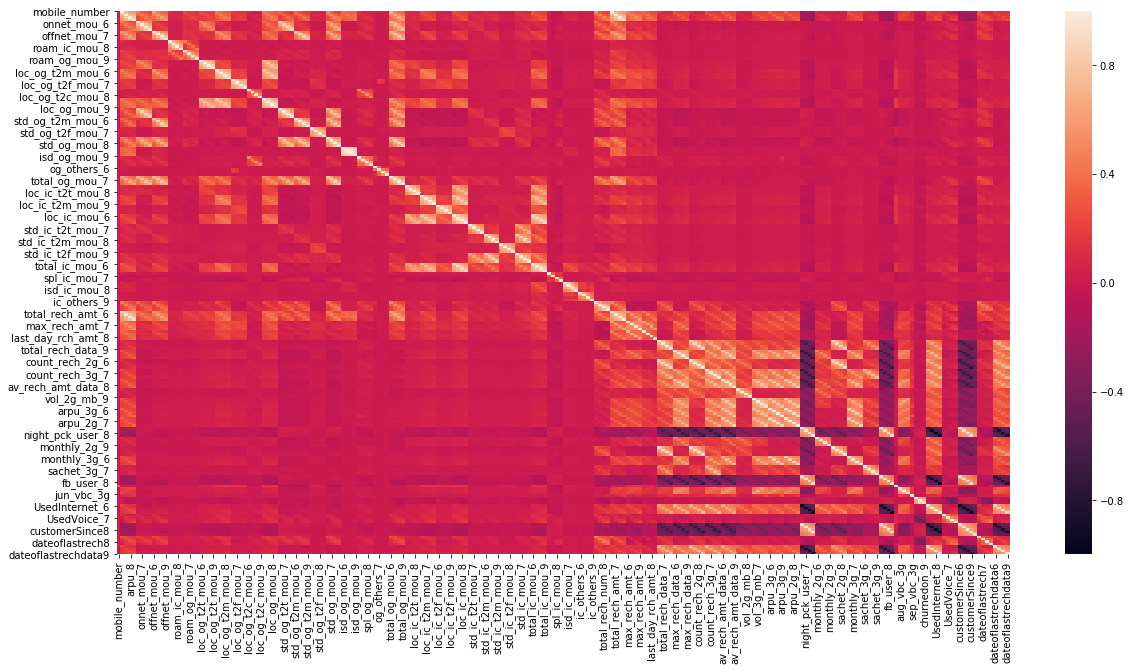

In [99]:
plt.figure(figsize=(20, 10))
sns.heatmap(churn_corr)

In [100]:
churn_corr[:4]

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,...,customerSince9,customerSince,dateoflastrech6,dateoflastrech7,dateoflastrech8,dateoflastrech9,dateoflastrechdata6,dateoflastrechdata7,dateoflastrechdata8,dateoflastrechdata9
mobile_number,1.000000,0.017617,0.01704,0.017017,0.022268,-0.000007,-0.001838,-0.001980,-0.003309,0.012563,...,0.004353,-0.001919,-0.010742,0.012184,-0.020941,0.068543,-0.018496,-0.021516,-0.018288,-0.009049
arpu_6,0.017617,1.000000,0.73210,0.633975,0.589611,0.454932,0.328728,0.259281,0.232325,0.622516,...,-0.152198,-0.124769,0.283566,0.129589,0.080379,0.064643,0.206519,0.142045,0.140866,0.138361
arpu_7,0.017040,0.732100,1.00000,0.769030,0.691140,0.326060,0.437811,0.347883,0.284721,0.470058,...,-0.177193,-0.142259,0.237071,0.255304,0.166799,0.126713,0.147338,0.214067,0.167781,0.161658
arpu_8,0.017017,0.633975,0.76903,1.000000,0.800302,0.247963,0.336569,0.435911,0.355257,0.372414,...,-0.207931,-0.159030,0.158510,0.223488,0.250674,0.176638,0.125024,0.155814,0.230991,0.188508


In [101]:
churnls_highCorr = pd.DataFrame(columns=["FirstCol", "SecondCol", "Corr"]);
churnls_lowCorr = pd.DataFrame(columns=["FirstCol", "SecondCol", "Corr"]);
for val in churn_corr.columns:
    for index, data in churn_corr.loc[churn_corr.index != val, val].iteritems():
        if((val[:-2]!=index[:-2])):
            if((data>=0.9)):
                churnls_highCorr.loc[len(churnls_highCorr)] = sorted([index, val])+ [data]
                #churnls_highCorr.append([sorted([index, val])+ [data]]);
            if((data <= -0.35)):
                churnls_lowCorr.loc[len(churnls_lowCorr)] = sorted([index, val])+ [data]
                #churnls_lowCorr.append([sorted([index, val])+ [data]])

In [102]:
churnls_highCorr.drop_duplicates(keep="first",inplace=True)
churnls_lowCorr.drop_duplicates(keep="first",inplace=True)

In [103]:
pd.DataFrame(churnls_highCorr).sort_values("Corr", ascending=False)

,FirstCol,SecondCol,Corr
40,customerSince9,night_pck_user_9,0.985179
38,customerSince8,night_pck_user_8,0.981774
36,customerSince7,night_pck_user_7,0.980594
34,customerSince6,night_pck_user_6,0.979833
2,arpu_8,total_rech_amt_8,0.955952
33,fb_user_6,night_pck_user_6,0.954962
0,arpu_6,total_rech_amt_6,0.953017
35,fb_user_7,night_pck_user_7,0.952610
3,arpu_9,total_rech_amt_9,0.952310
1,arpu_7,total_rech_amt_7,0.951995


The most positively corelated data fields are :
1. count_rech_2g <--> sachet_2g
2. arpu <--> total_rech_amt
3. arpu_2g <--> arpu_3g
4. loc_ic_mou <--> total_ic_mou

1. As customers opt for larger 2g recharge packages higher the chances of customer availing service schemes with validity smaller than a month.
2. Higher the average revenue per user higher the total recharge amount. This obvious.
3. Higher the average revenue per user higher the average revenue per user for 2g. - Higher revenue users are opting for 2g.
4. Higher the local incoming minutes of usage - voice calls more the total incoming minutes of usage - voice calls. - Obvious

In [104]:
pd.DataFrame(churnls_lowCorr).sort_values("Corr", ascending=False)

,FirstCol,SecondCol,Corr
572,customerSince7,jul_vbc_3g,-0.350287
415,night_pck_user_9,sachet_2g_8,-0.350335
570,aug_vbc_3g,customerSince8,-0.351067
3,night_pck_user_9,total_rech_data_6,-0.351261
269,customerSince,vol_3g_mb_9,-0.351814
...,...,...,...
629,UsedInternet_9,customerSince9,-0.987973
311,UsedInternet_6,night_pck_user_6,-0.995837
347,UsedInternet_7,night_pck_user_7,-0.996154
384,UsedInternet_8,night_pck_user_8,-0.996482


Most negatively Corelated:
1. max_rech_data <--> sachet_2g - as Maximum recharge data increases less likely is the customer to opt for sachet packages
2. count_rech_2g <--> max_rech_data - as the count of recharge of 2g increases lesser the maximum recharge of data.

In [105]:
set(uniqueColList)

{'arpu',
 'arpu_2g',
 'arpu_3g',
 'av_rech_amt_data',
 'count_rech_2g',
 'count_rech_3g',
 'date_of_last_rech',
 'date_of_last_rech_data',
 'fb_user',
 'ic_others',
 'isd_ic_mou',
 'isd_og_mou',
 'last_date_of_month',
 'last_day_rch_amt',
 'loc_ic_mou',
 'loc_ic_t2f_mou',
 'loc_ic_t2m_mou',
 'loc_ic_t2t_mou',
 'loc_og_mou',
 'loc_og_t2c_mou',
 'loc_og_t2f_mou',
 'loc_og_t2m_mou',
 'loc_og_t2t_mou',
 'max_rech_amt',
 'max_rech_data',
 'monthly_2g',
 'monthly_3g',
 'night_pck_user',
 'offnet_mou',
 'og_others',
 'onnet_mou',
 'roam_ic_mou',
 'roam_og_mou',
 'sachet_2g',
 'sachet_3g',
 'spl_ic_mou',
 'spl_og_mou',
 'std_ic_mou',
 'std_ic_t2f_mou',
 'std_ic_t2m_mou',
 'std_ic_t2o_mou',
 'std_ic_t2t_mou',
 'std_og_mou',
 'std_og_t2c_mou',
 'std_og_t2f_mou',
 'std_og_t2m_mou',
 'std_og_t2t_mou',
 'total_ic_mou',
 'total_og_mou',
 'total_rech_amt',
 'total_rech_data',
 'total_rech_num',
 'vbc_3g',
 'vol_2g_mb',
 'vol_3g_mb'}

In [106]:
churn_df.shape

(99999, 226)

In [107]:
churn_df.dropna(thresh=212)

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,...,customerSince9,customerSince,dateoflastrech6,dateoflastrech7,dateoflastrech8,dateoflastrech9,dateoflastrechdata6,dateoflastrechdata7,dateoflastrechdata8,dateoflastrechdata9
0,7000842753,197.385,214.816,213.803,21.100,0.00,0.00,0.00,0.00,0.00,...,9,6,21,16,8,28,21,16,8,0
1,7001865778,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,...,9,6,29,31,28,30,0,25,10,0
2,7001625959,167.690,189.058,210.226,290.714,11.54,55.24,37.26,74.81,143.33,...,0,6,17,24,14,29,0,0,0,17
3,7001204172,221.338,251.102,508.054,389.500,99.91,54.39,310.98,241.71,123.31,...,9,6,28,31,31,30,0,0,0,0
4,7000142493,261.636,309.876,238.174,163.426,50.31,149.44,83.89,58.78,76.96,...,9,7,26,28,9,28,4,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,7001548952,18.471,69.161,57.530,29.950,5.40,3.36,5.91,0.00,15.19,...,9,6,3,20,26,25,0,0,0,0
99995,7000607688,112.201,77.811,79.081,140.835,29.26,18.13,16.06,49.49,100.83,...,9,6,17,17,24,26,0,0,0,0
99996,7000087541,229.187,0.000,0.000,0.000,1.11,0.00,0.00,0.00,21.04,...,9,7,13,26,0,2,13,0,0,0
99997,7000498689,322.991,303.386,606.817,731.010,0.00,0.00,0.00,0.00,0.00,...,0,0,17,19,20,17,17,19,20,17


In [108]:
12369/99999

0.12369123691236912

Even if we take a thresh of 212 in given dataset, almost 87% of the data goes missing. Thus we will avoid dropna further.

## Data Derivation

As one of primary distinguishing feature of customers is prepaid and postpaid, Lets create one column to point if that customer is prepaid or postpaid.

In [109]:
churn_df.columns.values.tolist()

['mobile_number',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'arpu_9',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_t2f_mou_9',
 'std_

| ColumnNames | Details |
|--------------|--------------------------------|
|'mobile_number'||
|'arpu'| Average revenue per user|
|'onnet_mou_6'|All kind of calls within the same operator network|
|'offnet_mou_6'|All kind of calls outside the operator T network|
|'roam_ic_mou_6'|Indicates that customer is in roaming zone during the call - Incoming|
|'roam_og_mou_6'|Indicates that customer is in roaming zone during the call - Outgoing|
|'loc_og_t2t_mou_6'|Local calls - within same telecom circle outgoing - Operator T to T|
|'loc_og_t2m_mou_6', 'loc_ic_t2m_mou_6' |Local calls - within same telecom circle outgoing - Operator T to other operator mobile|
|'loc_og_t2f_mou_6','loc_ic_t2f_mou_6' |Local calls - within same telecom circle outgoing/incoming - Operator T to fixed lines of T|
|'loc_og_t2c_mou_6'| Local calls - within same telecom circle outgoing - Operator T to its own call center|
|'loc_og_mou_6', 'loc_ic_mou_6' | Local calls - within same telecom circle Outgoing/Incoming |
|'std_og_t2t_mou_6', 'std_ic_t2t_mou_6' | STD calls - outside the calling circle outgoing Operator T to T|
|'std_og_t2m_mou_6', 'std_ic_t2m_mou_6' | STD calls - outside the calling circle outgoing Operator T to Other Operator mobile|
|'std_og_t2f_mou_6', 'std_ic_t2f_mou_6' | STD calls - outside the calling circle outgoing Operator T to Fixed lines of T|
|'std_og_mou_6', 'std_ic_mou_6' | STD calls - outside the calling circle outgoing minutes of usage-Voice|
|'isd_og_mou_6', 'isd_ic_mou_6' | ISD calls - outgoing minutes of usage voice|
|'spl_og_mou_6', 'spl_ic_mou_6' | Special Calls - outgoing mintues of usage voice|
|'og_others_6', 'ic_others_6' | Outgoing Others|
|'total_og_mou_6', 'total_ic_mou_6' | Total outgoing mintues of voice|
|'loc_ic_t2t_mou_6', | Local incoming Operator T To T|
|'total_rech_num_6', | Total Recharge number|
|'total_rech_amt_6' | Total Recharge amount - revisit|
|'max_rech_amt_6' | Max recharge amount - check if the total rech amount and max recharge amount is decreasing.|
|'date_of_last_rech_6'| |
|'last_day_rch_amt_6' | Last Recharge amount|
|'date_of_last_rech_data_6' | last Date of recharge Data|
|'total_rech_data_6'| Total Recharge data|
|'max_rech_data_6' | Max Recharge Data|
|'count_rech_2g_6' | Count Recharge 2g|
|'count_rech_3g_6' | Count Recharge 3g|
|'av_rech_amt_data_6' | average recharge amount data.|
|'vol_2g_mb_6' | Mobile internet usage volume (in MB) 2G|
|'vol_3g_mb_6' | Mobile internet usage volume (in MB) 3G|
|'arpu_3g_6' | average revenue per user for 3g |
|'arpu_2g_6' | average revenue per user for 2g|
|'night_pck_user_6' | Night package user - Prepaid|
|'monthly_2g_6' | Service schemes with validity equivalent to a month 2g|
|'sachet_2g_6' | Service schemes with validity smaller than a month 2G|
|'monthly_3g_6' | Service schemes with validity equivalent to a month 3G|
|'sachet_3g_6' |  Service schemes with validity smaller than a month 2G|
|'fb_user_6' | Service scheme to avail services of Facebook and similar social networking sites|
|'aon' | Age on network - number of days the customer is using the operator T network|
|'aug_vbc_3g' | Volume based cost - when no specific scheme is not purchased and paid as per usage 3g|
|'churnedon_7'||


From the above column information it looks like for customers related fields:
1. Prepaid:
    1. Sachet.
    2. Monthly
    3. VBC 
<br>Not Sure how to distinguish customers with Postpaid. Probably if the customer is paying the same amount.
Also Same customer may be having both Postpaid and prepaid.

In [110]:
churn_df.loc[churn_df["max_rech_amt_6"]==churn_df["last_day_rch_amt_6"], 
             ["max_rech_amt_6", "last_day_rch_amt_6", "total_rech_amt_6", "date_of_last_rech_6",
              "max_rech_amt_7", "last_day_rch_amt_7", "total_rech_amt_7", "date_of_last_rech_7",
             "max_rech_amt_8", "last_day_rch_amt_8", "total_rech_amt_8", "date_of_last_rech_8",
              "max_rech_amt_9", "last_day_rch_amt_9", "total_rech_amt_9", "date_of_last_rech_9"
             ]]

,max_rech_amt_6,last_day_rch_amt_6,total_rech_amt_6,date_of_last_rech_6,max_rech_amt_7,last_day_rch_amt_7,total_rech_amt_7,date_of_last_rech_7,max_rech_amt_8,last_day_rch_amt_8,total_rech_amt_8,date_of_last_rech_8,max_rech_amt_9,last_day_rch_amt_9,total_rech_amt_9,date_of_last_rech_9
0,252,252,362,NaN,252,252,252,NaN,252,252,252,NaN,0,0,0,NaN
1,44,44,74,NaN,154,23,384,NaN,65,30,283,NaN,50,0,121,NaN
5,120,120,120,NaN,0,0,0,NaN,130,0,130,NaN,130,0,130,NaN
9,110,110,220,NaN,154,154,195,NaN,50,30,210,NaN,130,50,180,NaN
10,0,0,0,NaN,0,0,0,NaN,30,20,324,NaN,30,30,99,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99988,50,50,380,NaN,154,50,554,NaN,154,50,504,NaN,154,0,604,NaN
99993,0,0,0,NaN,0,0,0,NaN,94,94,94,NaN,0,0,0,NaN
99994,60,60,60,NaN,110,0,110,NaN,0,0,0,NaN,50,0,50,NaN
99997,202,202,381,NaN,179,179,358,NaN,179,179,716,NaN,252,179,862,NaN


In [111]:
churn_df.loc[churn_df["max_rech_amt_6"]!=churn_df["last_day_rch_amt_6"], 
             ["max_rech_amt_6", "last_day_rch_amt_6", "total_rech_amt_6", "date_of_last_rech_6",
              "max_rech_amt_7", "last_day_rch_amt_7", "total_rech_amt_7", "date_of_last_rech_7",
             "max_rech_amt_8", "last_day_rch_amt_8", "total_rech_amt_8", "date_of_last_rech_8",
              "max_rech_amt_9", "last_day_rch_amt_9", "total_rech_amt_9", "date_of_last_rech_9"
             ]]

,max_rech_amt_6,last_day_rch_amt_6,total_rech_amt_6,date_of_last_rech_6,max_rech_amt_7,last_day_rch_amt_7,total_rech_amt_7,date_of_last_rech_7,max_rech_amt_8,last_day_rch_amt_8,total_rech_amt_8,date_of_last_rech_8,max_rech_amt_9,last_day_rch_amt_9,total_rech_amt_9,date_of_last_rech_9
2,86,0,168,NaN,200,200,315,NaN,86,86,116,NaN,100,0,358,NaN
3,60,30,230,NaN,50,50,310,NaN,50,50,601,NaN,50,30,410,NaN
4,56,50,196,NaN,110,110,350,NaN,110,110,287,NaN,50,50,200,NaN
6,90,37,499,NaN,37,24,222,NaN,50,10,294,NaN,30,24,141,NaN
7,1580,0,1580,NaN,790,0,790,NaN,1580,779,3638,NaN,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99990,20,10,40,NaN,46,23,149,NaN,0,0,0,NaN,36,30,146,NaN
99991,60,30,120,NaN,110,30,200,NaN,130,130,260,NaN,50,50,110,NaN
99992,30,0,60,NaN,30,30,180,NaN,20,10,240,NaN,20,10,220,NaN
99995,110,0,110,NaN,110,0,110,NaN,149,149,182,NaN,30,30,30,NaN


Viewing the data we can say that the customers paying same recharge amount all through out the except ignoring the 0 are postpaid customers, wherease the customers paying differring amount for the 4 months are prepaid customers.

In [112]:
churn_df.loc[churn_df["max_rech_amt_6"]!=churn_df["last_day_rch_amt_6"], 
             ["max_rech_amt_6", "last_day_rch_amt_6", "total_rech_amt_6", "date_of_last_rech_6",
              "max_rech_amt_7", "last_day_rch_amt_7", "total_rech_amt_7", "date_of_last_rech_7",
             "max_rech_amt_8", "last_day_rch_amt_8", "total_rech_amt_8", "date_of_last_rech_8",
              "max_rech_amt_9", "last_day_rch_amt_9", "total_rech_amt_9", "date_of_last_rech_9"
             ]].head(1).values.tolist()

[[86.0,
  0.0,
  168.0,
  nan,
  200.0,
  200.0,
  315.0,
  nan,
  86.0,
  86.0,
  116.0,
  nan,
  100.0,
  0.0,
  358.0,
  nan]]

In [113]:
custPostPaid = [];
for index, val in churn_df[["max_rech_amt_6", "last_day_rch_amt_6", "max_rech_amt_7", "last_day_rch_amt_7", 
                     "max_rech_amt_8", "last_day_rch_amt_8", "max_rech_amt_9", "last_day_rch_amt_9"]].iterrows():
    #Find the most common occurence of amount and mark that value as recharge amount and check count of the other values.
    freqAmount = dict(collections.Counter(val.values.tolist()))
    # the records should be only 2 and the other item should be 0
    if((len(freqAmount)==2)&(0 in freqAmount)):
        custPostPaid.append(1)
    else:
        custPostPaid.append(0)

In [114]:
collections.Counter(custPostPaid)

Counter({1: 8625, 0: 91374})

In [115]:
churn_df["IsPostPaid"] = custPostPaid

In [116]:
churn_df.columns

Index(['mobile_number', 'arpu_6', 'arpu_7', 'arpu_8', 'arpu_9', 'onnet_mou_6',
       'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9', 'offnet_mou_6',
       ...
       'customerSince', 'dateoflastrech6', 'dateoflastrech7',
       'dateoflastrech8', 'dateoflastrech9', 'dateoflastrechdata6',
       'dateoflastrechdata7', 'dateoflastrechdata8', 'dateoflastrechdata9',
       'IsPostPaid'],
      dtype='object', length=227)

<b>The IsPostPaid needs to be verified</b>

Definitions of churn:
1. Revenue Based Churn - Customers who have not utilised any revenue-generating facilities such as mobile internet, outgoing calls, SMS etc. over a given period of time. One could also use aggregate metrics such as ‘customers who have generated less than INR 4 per month in total/average/median revenue’.
2. Usage Based Churn - Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time.

For Revenue based churn we have to look at the columns total/average/median(arpu, arpu_2g and arpu_3g)<= 4

In [117]:
revenueBasedChurn = [];
for index, val in churn_df[["arpu_6", "arpu_7", "arpu_8", "arpu_9",
                           "arpu_2g_6", "arpu_2g_7", "arpu_2g_8", "arpu_2g_9",
                           "arpu_3g_6", "arpu_3g_7", "arpu_3g_8", "arpu_3g_9",]].iterrows():
    #print(val.values.tolist())
    if( (sum(val.values.tolist()) <=4) or
       (np.mean(val.values.tolist()) <=4) or
       (np.median(val.values.tolist()) <=4)
    ):
        revenueBasedChurn.append(1);
    else:
        revenueBasedChurn.append(0);

In [118]:
collections.Counter(revenueBasedChurn)

Counter({0: 20969, 1: 79030})

In [119]:
churn_df["revenueBasedChurn"] = revenueBasedChurn

For usage based churn, all the columns with mou and columns vol_2g_mb, vol_3g_mb should be 0. 

In [120]:
usageCols = [val for val in churn_df.columns.values if(("mou" in val) or("vol_2g_mb" in val) or ("vol_3g_mb" in val))]

In [121]:
usageCols

['onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_t2f_mou_9',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'std_og_mou_9',


In [122]:
churn_df[['onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9']].sum(axis=1)

0          0.00
1        128.81
2        178.85
3        706.99
4        342.42
          ...  
99994     14.67
99995    112.94
99996      1.11
99997      0.00
99998     84.34
Length: 99999, dtype: float64

In [123]:
usageBasedChurn = [];
col6 = [col for col in usageCols if("_6" in col)]
col7 = [col for col in usageCols if("_7" in col)]
col8 = [col for col in usageCols if("_8" in col)]
col9 = [col for col in usageCols if("_9" in col)]
#print(col6)
for index, val in churn_df[usageCols].iterrows():
    #print(val[col6].values)
    #print(val[col6].to_frame())
    if((val[col6].sum(axis=0) ==0) or (val[col7].sum(axis=0) ==0) 
    or (val[col8].sum(axis=0) ==0) or (val[col9].sum(axis=0) ==0)):
        usageBasedChurn.append(1);
    else:
        usageBasedChurn.append(0)

In [124]:
collections.Counter(usageBasedChurn)

Counter({1: 11043, 0: 88956})

In [125]:
churn_df["usageBasedChurn"] = usageBasedChurn

In [126]:
churn_df.shape

(99999, 229)

## Marking High Value Customers
In the Indian and the southeast Asian market, approximately 80% of revenue comes from the top 20% customers (called high-value customers). Thus, if we can reduce churn of the high-value customers, we will be able to reduce significant revenue leakage.
<br>
Define high-value customers as follows: Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

Lets find the 70th percentile of the average recharge amount in for June and July. Will be using the columns - 
1. total_rech_amt
2. total_rech_data

In [127]:
rechCols = [val for val in churn_df.columns if(("total_rech_amt" in val) or ("total_rech_data" in val))]

In [128]:
highValue70th = np.percentile(churn_df[rechCols].mean(axis=1), 70, interpolation='midpoint')
print(highValue70th)

180.5


In [129]:
highValueCust = churn_df[rechCols].mean(axis=1).apply(lambda val:1 if(val >= highValue70th) else 0);


In [130]:
collections.Counter(highValueCust)

Counter({0: 69995, 1: 30004})

In [131]:
churn_df["highValueCust"] = highValueCust

In [132]:
churn_df.columns

Index(['mobile_number', 'arpu_6', 'arpu_7', 'arpu_8', 'arpu_9', 'onnet_mou_6',
       'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9', 'offnet_mou_6',
       ...
       'dateoflastrech8', 'dateoflastrech9', 'dateoflastrechdata6',
       'dateoflastrechdata7', 'dateoflastrechdata8', 'dateoflastrechdata9',
       'IsPostPaid', 'revenueBasedChurn', 'usageBasedChurn', 'highValueCust'],
      dtype='object', length=230)

Overall lets see which categories does high values customer's fall into
1. HighValueCustomer - Prepaid - Postpaid
2. HighValueCustomer - RevenueBased Churn
3. HighValueCustomer - UsageBased Churn
4. HighValueCustomer - ChurnedOn

In [133]:
churn_df["meanRech"] = churn_df[rechCols].mean(axis=1)

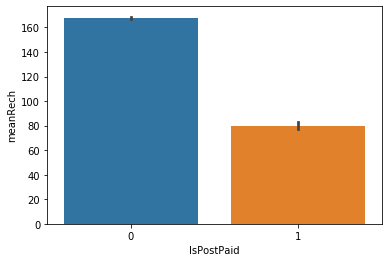

In [134]:
sns.barplot(x=churn_df["IsPostPaid"], y=churn_df["meanRech"])

Here you notice that Prepaid customers are having higher average recharge amount, than postpaid.

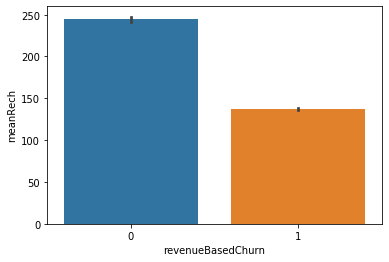

In [135]:
sns.barplot(x=churn_df["revenueBasedChurn"], y=churn_df["meanRech"])

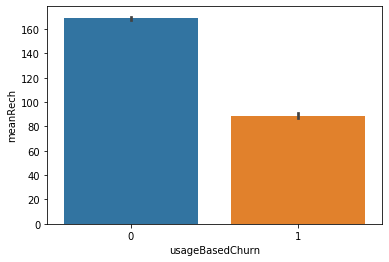

In [136]:
sns.barplot(x=churn_df["usageBasedChurn"], y=churn_df["meanRech"])

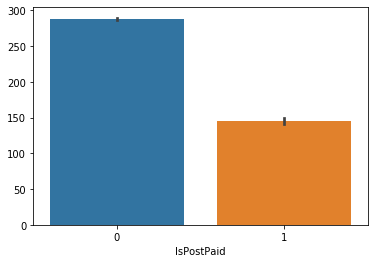

In [137]:
sns.barplot(x=churn_df["IsPostPaid"],y=churn_df[['arpu_6', 'arpu_7', 'arpu_8', 'arpu_9']].mean(axis=1))

Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes you need to use to tag churners are:
1. total_ic_mou_9
2. total_og_mou_9
3. vol_2g_mb_9
4. vol_3g_mb_9

In [138]:
actualChurn =churn_df[["total_ic_mou_9", "total_og_mou_9", "vol_2g_mb_9", "vol_3g_mb_9"]].sum(axis=1).apply(lambda val:1 if (val >0) else 0)


In [139]:
actualChurn.value_counts()

1    89808
0    10191
dtype: int64

In [140]:
churn_df["actualChurn"] = actualChurn

After tagging churners, remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names).

In [141]:
delCols = [val for val in churn_df.columns if(("_9" in val) or ("sep" in val) or ("churn" in val) or ("Churn" in val))]

In [142]:
delCols

['arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'total_og_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'last_day_rch_amt_9',
 'total_rech_data_9',
 'max_rech_data_9',
 'count_rech_2g_9',
 'count_rech_3g_9',
 'av_rech_amt_data_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'arpu_3g_9',
 'arpu_2g_9',
 'night_pck_user_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 'sachet_3g_9',
 'fb_user_9',
 'sep_vbc_3g',
 'churnedon_7',
 'churnedon_8',
 'churnedon_9',
 'UsedInternet_9',
 'UsedVoi

In [143]:
finalChurn_df = churn_df.drop(columns=delCols, axis=1).copy()

In [144]:
finalChurn_df["actualChurn"] = churn_df["actualChurn"].copy()

In [145]:
finalChurn_df.columns

Index(['mobile_number', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6',
       'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7',
       'offnet_mou_8',
       ...
       'dateoflastrech8', 'dateoflastrech9', 'dateoflastrechdata6',
       'dateoflastrechdata7', 'dateoflastrechdata8', 'dateoflastrechdata9',
       'IsPostPaid', 'highValueCust', 'meanRech', 'actualChurn'],
      dtype='object', length=175)

In [146]:
finalChurn_df.columns[finalChurn_df.dtypes=='O']

Index([], dtype='object')

## Modelling
The predictive model that you’re going to build will serve two purposes:

1. It will be used to predict whether a high-value customer will churn or not, in near future (i.e. churn phase). By knowing this, the company can take action steps such as providing special plans, discounts on recharge etc.

2. It will be used to identify important variables that are strong predictors of churn. These variables may also indicate why customers choose to switch to other networks.

Create train and test data for running different models

In [147]:
from sklearn.model_selection import train_test_split

In [148]:
finalChurn_df.columns.values

array(['mobile_number', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6',
       'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7',
       'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8',
       'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8',
       'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
       'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
       'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6',
       'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6',
       'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6',
       'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6',
       'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7',
       'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8',
       'og_others_6', 'og_others_7', 'og_others_

In [149]:
ColsToBeAnalysed = ['mobile_number', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6',
       'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7',
       'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8',
       'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8',
       'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
       'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
       'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6',
       'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6',
       'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6',
       'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6',
       'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7',
       'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8',
       'og_others_6', 'og_others_7', 'og_others_8', 'total_og_mou_6',
       'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_6',
       'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6',
       'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_6',
       'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8', 'loc_ic_mou_6',
       'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_t2t_mou_6',
       'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_6',
       'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_6',
       'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8', 'std_ic_mou_6',
       'std_ic_mou_7', 'std_ic_mou_8', 'total_ic_mou_6', 'total_ic_mou_7',
       'total_ic_mou_8', 'spl_ic_mou_6', 'spl_ic_mou_7', 'spl_ic_mou_8',
       'isd_ic_mou_6', 'isd_ic_mou_7', 'isd_ic_mou_8', 'ic_others_6',
       'ic_others_7', 'ic_others_8', 'total_rech_num_6',
       'total_rech_num_7', 'total_rech_num_8', 'total_rech_amt_6',
       'total_rech_amt_7', 'total_rech_amt_8', 'max_rech_amt_6',
       'max_rech_amt_7', 'max_rech_amt_8', 'last_day_rch_amt_6',
       'last_day_rch_amt_7', 'last_day_rch_amt_8', 'total_rech_data_6',
       'total_rech_data_7', 'total_rech_data_8', 'max_rech_data_6',
       'max_rech_data_7', 'max_rech_data_8', 'count_rech_2g_6',
       'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_3g_6',
       'count_rech_3g_7', 'count_rech_3g_8', 'av_rech_amt_data_6',
       'av_rech_amt_data_7', 'av_rech_amt_data_8', 'vol_2g_mb_6',
       'vol_2g_mb_7', 'vol_2g_mb_8', 'vol_3g_mb_6', 'vol_3g_mb_7',
       'vol_3g_mb_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6',
       'arpu_2g_7', 'arpu_2g_8', 'night_pck_user_6', 'night_pck_user_7',
       'night_pck_user_8', 'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8',
       'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 'monthly_3g_6',
       'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7',
       'sachet_3g_8', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'aon',
       'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'UsedInternet_6',
       'UsedInternet_7', 'UsedInternet_8', 'UsedVoice_6', 'UsedVoice_7',
       'UsedVoice_8', 'customerSince6', 'customerSince7',
       'customerSince8', 
       'dateoflastrech6', 'dateoflastrech7', 'dateoflastrech8',
       'dateoflastrech9', 'dateoflastrechdata6', 'dateoflastrechdata7',
       'dateoflastrechdata8', 'dateoflastrechdata9', 'IsPostPaid',
       'highValueCust', 'meanRech']

In [150]:
X = finalChurn_df[ColsToBeAnalysed]
X = X[X.columns[X.dtypes!="datetime64[ns]"]]

In [151]:
y = finalChurn_df["actualChurn"]

In [152]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42 )

In [153]:
from sklearn.preprocessing import MinMaxScaler

In [154]:
scaler = MinMaxScaler();
X_train = scaler.fit_transform(X_train)

In [155]:
X_test = scaler.transform(X_test)

### Lasso regression

In [156]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [157]:
# grid search CV

# set up cross validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

# specify range of hyperparameters
params = {'alpha': [0.00001, 0.0001, 0.001, 0.01, 1.0, 5.0, 10.0]}

# grid search
# lasso model
model = Lasso()
model_cv = GridSearchCV(estimator = model, param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True, verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:  1.8min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 1.0, 5.0, 10.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [158]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,9.872432,0.224248,0.006403,0.000968,1e-05,{'alpha': 1e-05},0.426939,0.427534,0.418967,0.422801,...,0.419581,0.009479,1,0.421303,0.421406,0.423162,0.421762,0.427695,0.423066,0.002409
1,7.040256,0.448784,0.006387,0.000486,0.0001,{'alpha': 0.0001},0.408550,0.412211,0.398641,0.409718,...,0.402865,0.009963,2,0.402391,0.402034,0.405024,0.402218,0.408229,0.403979,0.002390
2,2.648113,0.346522,0.005698,0.000406,0.001,{'alpha': 0.001},0.367117,0.374110,0.353871,0.362128,...,0.358392,0.013545,3,0.358533,0.356833,0.360764,0.357892,0.362668,0.359338,0.002104
3,0.480069,0.010084,0.005785,0.000399,0.01,{'alpha': 0.01},0.310664,0.315047,0.300958,0.305818,...,0.303796,0.009852,4,0.301148,0.300040,0.305885,0.303397,0.310844,0.304263,0.003853
4,0.458970,0.021071,0.006384,0.001017,1,{'alpha': 1.0},-0.000154,-0.000006,-0.000002,-0.000009,...,-0.000113,0.000152,5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


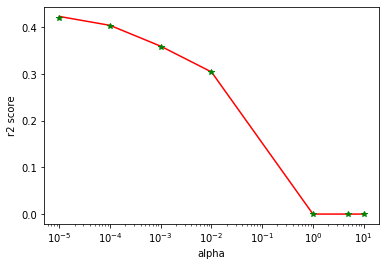

In [159]:
# plot
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'], 'r-')
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'], 'g*')
plt.xlabel('alpha')
plt.ylabel('r2 score')
plt.xscale('log')
plt.show()

In [176]:
from sklearn.metrics import r2_score

In [177]:
# model with optimal alpha
# lasso regression
lm = Lasso(alpha=0.00001)
lm.fit(X_train, y_train)

Lasso(alpha=1e-05, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [178]:
# lasso model parameters
model_parameters = list(lm.coef_)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
sorted(list(zip(cols, model_parameters)), key=(lambda x: x[1]))

[('total_rech_amt_8', -5.324),
 ('total_rech_amt_6', -3.758),
 ('total_rech_amt_7', -3.176),
 ('arpu_7', -2.266),
 ('arpu_8', -1.464),
 ('arpu_6', -0.905),
 ('roam_ic_mou_8', -0.799),
 ('roam_og_mou_7', -0.722),
 ('roam_og_mou_8', -0.689),
 ('constant', -0.549),
 ('std_og_mou_6', -0.454),
 ('total_ic_mou_7', -0.221),
 ('roam_og_mou_6', -0.199),
 ('total_rech_num_7', -0.195),
 ('spl_og_mou_7', -0.174),
 ('std_og_mou_7', -0.17),
 ('std_ic_mou_6', -0.17),
 ('max_rech_amt_7', -0.159),
 ('std_ic_t2t_mou_7', -0.151),
 ('arpu_3g_8', -0.115),
 ('isd_ic_mou_7', -0.108),
 ('sachet_3g_7', -0.098),
 ('isd_ic_mou_8', -0.096),
 ('IsPostPaid', -0.08),
 ('loc_og_t2c_mou_7', -0.075),
 ('std_og_t2m_mou_7', -0.065),
 ('total_rech_num_6', -0.046),
 ('total_ic_mou_6', -0.042),
 ('vol_2g_mb_7', -0.03),
 ('sachet_2g_6', -0.029),
 ('loc_ic_t2m_mou_6', -0.026),
 ('dateoflastrech7', -0.025),
 ('onnet_mou_6', -0.018),
 ('sachet_3g_6', -0.018),
 ('dateoflastrech6', -0.015),
 ('last_day_rch_amt_6', -0.012),
 ('jul

In [179]:
selectedColumns = ["std_og_mou_6", "IsPostPaid", "night_pck_user_8", "dateoflastrech6",  
                  "highValueCust", "UsedVoice_6", "customerSince6", "dateoflastrechdata9", "customerSince7",
                  "UsedVoice_7", "dateoflastrech8", "aon", "UsedInternet_8", "customerSince8", 
                   "dateoflastrech9", 'UsedVoice_8']

## Logistic Regression

In [180]:
from sklearn.linear_model import LogisticRegression

In [181]:
lr = LogisticRegression()
lr.fit(X_train, y_train);
lrPredictions = lr.predict(X_test)

In [182]:
# printing the overall accuracy
from sklearn import metrics

In [183]:
print(metrics.accuracy_score(y_test,lrPredictions))

0.936


### PCA

In [184]:
from sklearn.decomposition import PCA

In [185]:
pca = PCA(svd_solver='randomized', random_state=42)

In [186]:
#Doing the PCA on the train data
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

In [187]:
pca.components_

array([[-4.14340658e-03,  1.89984894e-03,  1.73388677e-03, ...,
        -1.94922749e-02,  1.01994186e-01,  1.81763576e-03],
       [-1.01881928e-02, -6.96530066e-04, -2.14818884e-03, ...,
         6.00263907e-02, -2.01622762e-01, -2.78588827e-03],
       [ 3.33696510e-03,  2.31690211e-03, -6.06493659e-04, ...,
         3.82374358e-03,  6.78335244e-02,  8.57831982e-04],
       ...,
       [ 0.00000000e+00, -4.63546013e-16,  4.26665875e-17, ...,
        -3.69307003e-18, -8.32290393e-18,  3.63889432e-16],
       [-0.00000000e+00,  4.29266194e-16, -1.03343775e-15, ...,
        -1.84718847e-17,  1.40922476e-18,  1.36587590e-16],
       [ 0.00000000e+00,  1.81157172e-16, -3.01818108e-16, ...,
        -2.05359502e-18, -3.45584905e-19,  1.70999959e-16]])

In [188]:
colnames = list(X.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df.head()

,PC1,PC2,Feature
0,-0.004143,-0.010188,mobile_number
1,0.001900,-0.000697,arpu_6
2,0.001734,-0.002148,arpu_7
3,0.001854,-0.004244,arpu_8
4,0.000343,-0.005412,onnet_mou_6


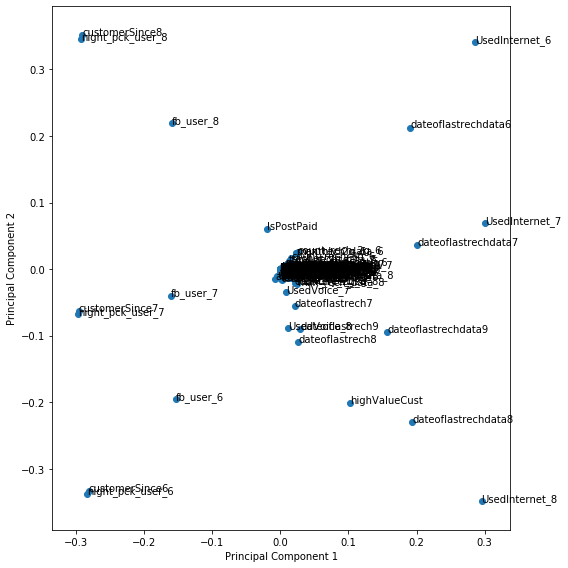

In [189]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

In [190]:
pca.explained_variance_ratio_

array([5.10068342e-01, 1.00929410e-01, 7.52015628e-02, 7.10771960e-02,
       3.95249982e-02, 3.02444817e-02, 2.08279356e-02, 1.86319539e-02,
       1.63999572e-02, 1.62814015e-02, 1.23289287e-02, 1.13460468e-02,
       1.01703922e-02, 8.18171227e-03, 7.45040742e-03, 5.58159095e-03,
       4.87175197e-03, 4.22274466e-03, 3.96415053e-03, 2.89082301e-03,
       2.69164171e-03, 2.52328672e-03, 2.30608822e-03, 1.66689138e-03,
       1.49748829e-03, 1.18556241e-03, 1.12457356e-03, 1.06076995e-03,
       9.17441283e-04, 8.93899607e-04, 7.95083074e-04, 7.65145824e-04,
       7.28939489e-04, 6.35698868e-04, 5.79562134e-04, 5.26171382e-04,
       5.06808127e-04, 4.90722049e-04, 4.74427620e-04, 4.28337240e-04,
       4.11545371e-04, 3.91095293e-04, 3.56021332e-04, 3.44467435e-04,
       3.08799808e-04, 2.97199992e-04, 2.89594872e-04, 2.79443643e-04,
       2.72384235e-04, 2.67261346e-04, 2.38265449e-04, 2.32756396e-04,
       1.84921920e-04, 1.78423697e-04, 1.71127478e-04, 1.68848878e-04,
      

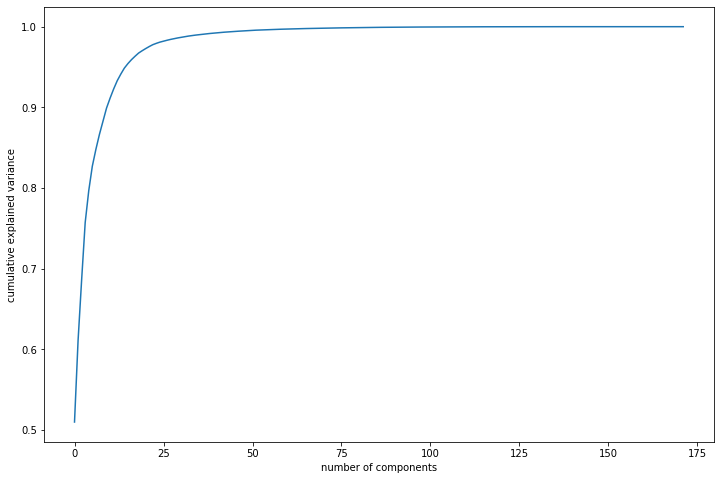

In [191]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [193]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=20)

In [194]:
df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape

(69999, 20)

In [195]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_train_pca.transpose())

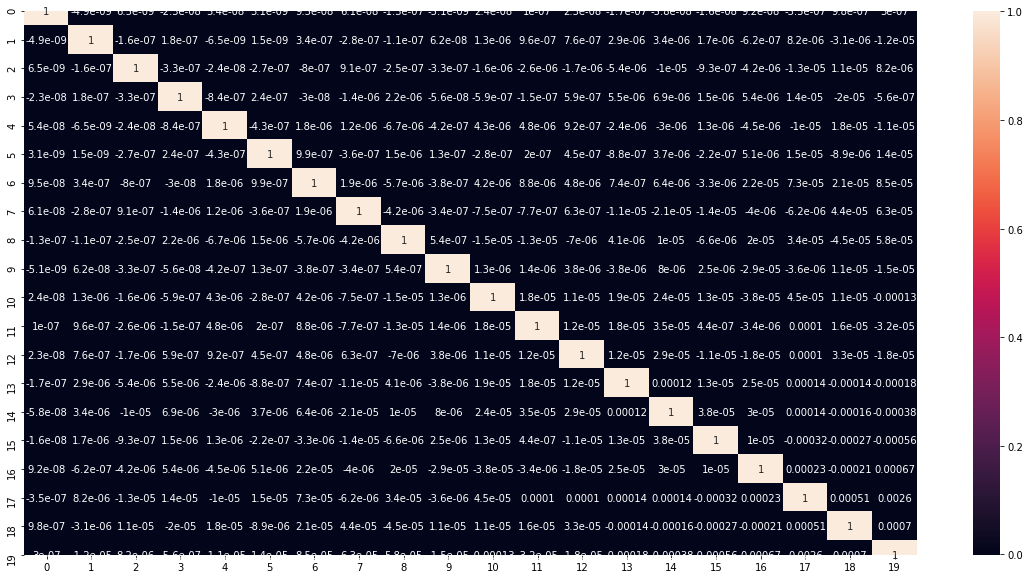

In [196]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)

In [197]:
#Applying selected components to the test data - 16 components
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(30000, 20)

In [198]:
#Training the model on the train data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

learner_pca = LogisticRegression()
model_pca = learner_pca.fit(df_train_pca,y_train)

In [199]:
#Making prediction on the test data
pred_probs_test = model_pca.predict_proba(df_test_pca)[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test))

'0.89'

In [200]:
pca_again = PCA(0.90)

In [201]:
df_train_pca2 = pca_again.fit_transform(X_train)
df_train_pca2.shape
# we see that PCA selected 11 components

(69999, 11)

In [202]:
#training the regression model
learner_pca2 = LogisticRegression()
model_pca2 = learner_pca2.fit(df_train_pca2,y_train)

In [203]:
df_test_pca2 = pca_again.transform(X_test)
df_test_pca2.shape

(30000, 11)

In [204]:
#Making prediction on the test data
pred_probs_test2 = model_pca2.predict_proba(df_test_pca2)[:,1]
"{:2.2f}".format(metrics.roc_auc_score(y_test, pred_probs_test2))

'0.88'

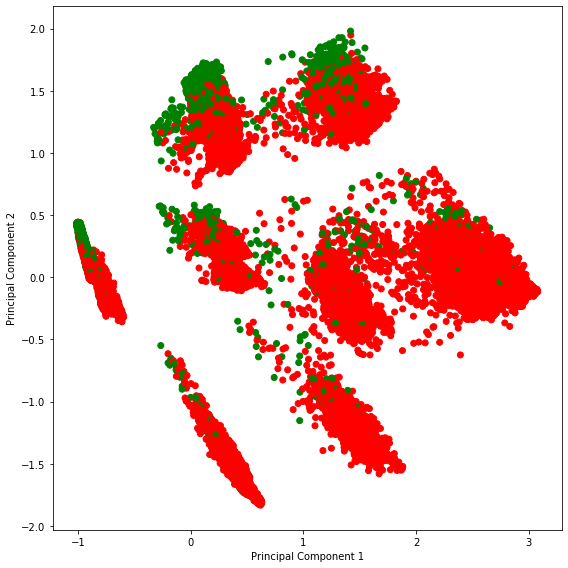

In [205]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(df_train_pca[:,0], df_train_pca[:,1], c = y_train.map({0:'green',1:'red'}))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()